# Mount Drive



In [ ]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/CSV_Versions/Miame-Dade_2023.csv'


Mounted at /content/drive


#Getting Started

In [ ]:
import os  # For file operations
import numpy as np  # For numerical operations
import pandas as pd  # For data handling
import seaborn as sns  # For visualizations
import matplotlib.pyplot as plt  # For plotting
from sklearn.model_selection import train_test_split, cross_val_score  # Data splitting and evaluation
from sklearn.linear_model import Ridge  # Ridge regression model
from sklearn.metrics import mean_squared_error, r2_score  # Evaluation metrics
from sklearn.preprocessing import StandardScaler  # Feature scaling
from sklearn.impute import SimpleImputer  # Handling missing values
from statsmodels.stats.outliers_influence import variance_inflation_factor  # VIF for multicollinearity


# Miami 2023 Data Frames
Dataset for Miami-Dade County in 2023, loaded for analysis.

In [ ]:
# Get path for the 2023 Data on Miami Dade County
M23_UR_path = '/content/drive/My Drive/MasterCard Data Challenge/Data Sets/CSV_Versions/Miame-Dade_2023.csv'
M23_USA_path = '/content/drive/My Drive/MasterCard Data Challenge/Data Sets/CSV_Versions/Miame-Dade_2023_USA.csv'
M23_state_path = '/content/drive/My Drive/MasterCard Data Challenge/Data Sets/CSV_Versions/Miame-Dade_2023_state.csv'

# Read files, header is the second row
miami_UR_2023 = pd.read_csv(M23_UR_path, header = 1)
miami_USA_2023 = pd.read_csv(M23_USA_path, header = 1)
miami_state_2023 = pd.read_csv(M23_state_path, header = 1)

#Drop first row
miami_2023UR = miami_UR_2023.drop(0).reset_index(drop=True)
miami_2023USA = miami_USA_2023.drop(0).reset_index(drop=True)
miami_2023state = miami_state_2023.drop(0).reset_index(drop=True)

#print(miami_2023UR_df.columns)
#print(miami_2023USA_df.columns)
#print(miami_2023state_df.columns)

# Merging the Urban and USA datasets on 'Census Tract FIPS code'
M23_UR_US = pd.merge(miami_2023UR, miami_2023USA, on='Census Tract FIPS code', how='outer')

# Merging the result with the State dataset to create a fully merged dataset for 2023
miami23_data = pd.merge(M23_UR_US, miami_2023state, on='Census Tract FIPS code', how='outer')

#print(miami23_data.head())
#miami_2023USA_df.head(20)

#View the meged data
miami_2023UR.head(20)

N/A Is an Opportunity Zone  Census Tract FIPS code             County  \
0    0.0                    NaN            1.208600e+10  Miami-Dade County   
1    1.0                    NaN            1.208601e+10  Miami-Dade County   
2    2.0                    NaN            1.208600e+10  Miami-Dade County   
3    3.0                    NaN            1.208600e+10  Miami-Dade County   
4    4.0                    NaN            1.208601e+10  Miami-Dade County   
5    5.0                    NaN            1.208600e+10  Miami-Dade County   
6    6.0                    NaN            1.208601e+10  Miami-Dade County   
7    7.0                    NaN            1.208602e+10  Miami-Dade County   
8    8.0                    NaN            1.208601e+10  Miami-Dade County   
9    9.0                    NaN            1.208601e+10  Miami-Dade County   
10  10.0                    NaN            1.208601e+10  Miami-Dade County   
11  11.0                    NaN            1.208600e+10  Miami-Dade County   
12  12.0                    NaN            1.208602e+10  Miami-Dade County   
13  13.0                    NaN            1.208601e+10  Miami-Dade County   
14  14.0                    NaN            1.208601e+10  Miami-Dade County   
15  15.0                    NaN            1.208600e+10  Miami-Dade County   
16  16.0                    NaN            1.208600e+10  Miami-Dade County   
17  17.0                    NaN            1.208601e+10  Miami-Dade County   
18  18.0                    NaN            1.208600e+10  Miami-Dade County   
19  19.0                    NaN            1.208600e+10  Miami-Dade County   

      State    Year  Inclusive Growth Score  Growth  Inclusion  Place  ...  \
0   Florida  2023.0                    48.0    54.0       41.0   44.0  ...   
1   Florida  2023.0                    50.0    52.0       49.0   41.0  ...   
2   Florida  2023.0                    58.0    61.0       56.0   61.0  ...   
3   Florida  2023.0                    47.0    61.0       33.0   26.0  ...   
4   Florida  2023.0                    56.0    63.0       50.0   64.0  ...   
5   Florida  2023.0                    40.0    49.0       30.0   30.0  ...   
6   Florida  2023.0                    42.0    48.0       37.0   51.0  ...   
7   Florida  2023.0                    48.0    57.0       38.0   39.0  ...   
8   Florida  2023.0                    52.0    52.0       51.0   41.0  ...   
9   Florida  2023.0                    52.0    49.0       54.0   46.0  ...   
10  Florida  2023.0                    46.0    46.0       47.0   25.0  ...   
11  Florida  2023.0                    40.0    63.0       17.0   44.0  ...   
12  Florida  2023.0                    40.0    43.0       37.0   28.0  ...   
13  Florida  2023.0                    52.0    70.0       34.0   48.0  ...   
14  Florida  2023.0                    47.0    51.0       43.0   49.0  ...   
15  Florida  2023.0                    54.0    69.0       39.0   46.0  ...   
16  Florida  2023.0                    49.0    59.0       39.0   30.0  ...   
17  Florida  2023.0                    44.0    42.0       46.0   38.0  ...   
18  Florida  2023.0                    45.0    44.0       46.0   34.0  ...   
19  Florida  2023.0                    52.0    68.0       35.0   52.0  ...   

    Female Above Poverty Tract, %  Gini Coefficient Score  \
0                            90.6                    22.0   
1                            77.1                    28.0   
2                            82.8                    79.0   
3                            92.5                     1.0   
4                            89.6                    56.0   
5                            84.1                    23.0   
6                            84.9                    51.0   
7                            86.9                    65.0   
8                            93.3                    31.0   
9                            95.9                    13.0   
10                           97.6                    36.

Data Cleaning

In [ ]:
# For each column in the DataFrame, fill the N/A values with the column's mean
miami23_data = miami23_data.apply(lambda col: col.fillna(col.mean()) if col.dtype != 'O' else col)

#View the description of the data
print(miami23_data.describe())
print(miami23_data.head())

#View the data
miami23_data

            N/A_x  Census Tract FIPS code  Year_x  Inclusive Growth Score_x  \
count  518.000000            5.180000e+02   518.0                518.000000   
mean   258.500000            1.208603e+10  2023.0                 45.115308   
std    149.677988            1.356802e+05     0.0                  7.953116   
min      0.000000            1.208600e+10  2023.0                 23.000000   
25%    129.250000            1.208600e+10  2023.0                 40.000000   
50%    258.500000            1.208601e+10  2023.0                 45.000000   
75%    387.750000            1.208601e+10  2023.0                 50.000000   
max    517.000000            1.208698e+10  2023.0                 68.000000   

         Growth_x  Inclusion_x     Place_x  Place Growth_x  Place Inclusion_x  \
count  518.000000   518.000000  518.000000      518.000000         518.000000   
mean    49.497099    40.814672   38.913556       46.324752          32.183398   
std      9.313085    11.521757   11.189090   

N/A_x Is an Opportunity Zone_x  Census Tract FIPS code  \
0    175.0                      NaN            1.208600e+10   
1    291.0                      Yes            1.208600e+10   
2    484.0                      NaN            1.208600e+10   
3      3.0                      NaN            1.208600e+10   
4     30.0                      NaN            1.208600e+10   
..     ...                      ...                     ...   
513  173.0                      NaN            1.208698e+10   
514  130.0                      NaN            1.208698e+10   
515  306.0                      Yes            1.208698e+10   
516  245.0                      NaN            1.208698e+10   
517  121.0                      NaN            1.208698e+10   

              County_x  State_x  Year_x  Inclusive Growth Score_x  Growth_x  \
0    Miami-Dade County  Florida  2023.0                 51.000000      53.0   
1    Miami-Dade County  Florida  2023.0                 50.000000      59.0   
2    Miami-Dade County  Florida  2023.0                 41.000000      43.0   
3    Miami-Dade County  Florida  2023.0                 47.000000      61.0   
4    Miami-Dade County  Florida  2023.0                 42.000000      50.0   
..                 ...      ...     ...                       ...       ...   
513  Miami-Dade County  Florida  2023.0                 45.115308      53.0   
514  Miami-Dade County  Florida  2023.0                 42.000000      65.0   
515  Miami-Dade County  Florida  2023.0                 45.115308      38.0   
516  Miami-Dade County  Florida  2023.0                 45.115308      13.0   
517  Miami-Dade County  Florida  2023.0                 45.115308      45.0   

     Inclusion_x    Place_x  ...  Female Above Poverty Tract, %  \
0           49.0  52.000000  ...                      80.400000   
1           41.0  36.000000  ...                      74.300000   
2           39.0  31.000000  ...                      84.500000   
3           33.0  26.000000  ...                      92.500000   
4           35.0  46.000000  ...                      91.200000   
..           ...        ...  ...                            ...   
513         50.0  38.913556  ...                      82.344309   
514         18.0  52.000000  ...                      82.344309   
515         44.0  38.913556  ...                      82.344309   
516         48.0  38.913556  ...                      82.344309   
517         38.0  38.913556  ...                      82.344309   

     Gini Coefficient Score  Gini Coefficient Base  Gini Coefficient Tract  \
0                  2.000000                   42.5               59.700000   
1                 60.000000                   42.5               41.000000   
2                  7.000000                   42.5               55.200000   
3                  2.000000                   42.5               60.200000   
4                  1.000000                   42.5               61.700000   
..                      ...                    ...                     ...   
513               45.470356                   42.5               44.633597   
514               18.000000                   42.5               49.400000   
515               45.470356                   42.5               44.633597   
516               45.470356                   42.5               44.633597   
517               45.470356                   42.5               44.633597   

     Early Education Enrollment Score  Early Education Enrollment Base, %  \
0                           55.960486                                29.4   
1                           55.960486                                29.4   
2                           55.960486                                29.4   
3                           38.000000                                29.4   
4                           47.000000                                29.4   
..                                ...                                 ...   
513               

In [ ]:
# Drop columns that contain Spend Growth Base, Spend Growth Tract County State and Year by Keywords
miami23_data = miami23_data.filter(regex='^(?!Spend Growth Base|Spend Growth Tract|County|State|Year)').copy()

# Replace N/A with 0 and 'Yes' with 1 in the Is an Opportunity Zone column
miami23_data['Is an Opportunity Zone_x'] = miami23_data['Is an Opportunity Zone_x'].fillna(0).replace({'Yes': 1})

#Check data
miami23_data

<ipython-input-6-0adb8f37f616>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  miami23_data['Is an Opportunity Zone_x'] = miami23_data['Is an Opportunity Zone_x'].fillna(0).replace({'Yes': 1})


N/A_x  Is an Opportunity Zone_x  Census Tract FIPS code  \
0    175.0                         0            1.208600e+10   
1    291.0                         1            1.208600e+10   
2    484.0                         0            1.208600e+10   
3      3.0                         0            1.208600e+10   
4     30.0                         0            1.208600e+10   
..     ...                       ...                     ...   
513  173.0                         0            1.208698e+10   
514  130.0                         0            1.208698e+10   
515  306.0                         1            1.208698e+10   
516  245.0                         0            1.208698e+10   
517  121.0                         0            1.208698e+10   

     Inclusive Growth Score_x  Growth_x  Inclusion_x    Place_x  \
0                   51.000000      53.0         49.0  52.000000   
1                   50.000000      59.0         41.0  36.000000   
2                   41.000000      43.0         39.0  31.000000   
3                   47.000000      61.0         33.0  26.000000   
4                   42.000000      50.0         35.0  46.000000   
..                        ...       ...          ...        ...   
513                 45.115308      53.0         50.0  38.913556   
514                 42.000000      65.0         18.0  52.000000   
515                 45.115308      38.0         44.0  38.913556   
516                 45.115308      13.0         48.0  38.913556   
517                 45.115308      45.0         38.0  38.913556   

     Place Growth_x  Place Inclusion_x  Net Occupancy Score_x  ...  \
0         53.000000               50.0              58.000000  ...   
1         38.000000               34.0              23.000000  ...   
2         33.000000               29.0              33.000000  ...   
3         31.000000               21.0              15.000000  ...   
4         52.000000               40.0              56.000000  ...   
..              ...                ...                    ...  ...   
513       46.324752              100.0              44.221328  ...   
514       63.000000               40.0              63.000000  ...   
515       46.324752               52.0              44.221328  ...   
516       46.324752               95.0              44.221328  ...   
517       46.324752               45.0              44.221328  ...   

     Female Above Poverty Tract, %  Gini Coefficient Score  \
0                        80.400000                2.000000   
1                        74.300000               60.000000   
2                        84.500000                7.000000   
3                        92.500000                2.000000   
4                        91.200000                1.000000   
..                             ...                     ...   
513                      82.344309               45.470356   
514                      82.344309               18.000000   
515                      82.344309               45.470356   
516                      82.344309               45.470356   
517                      82.344309               45.470356   

     Gini Coefficient Base  Gini Coefficient Tract  \
0                     42.5               59.700000   
1                     42.5               41.000000   
2                     42.5               55.200000   
3                     42.5               60.200000   
4                     42.5               61.700000   
..                     ...                     ...   
513                   42.5               44.633597   
514                   42.5               49.400000   
515                   42.5               44.633597   
516                   42.5               44.633597   
517                   42.5               44.633597   

     Early Education Enrollment Score  Early Education Enrollment Base, %  \
0                           55.960486                                29.4   
1                           55.960486     

Correlation and Plots of the 2023 Dataset to see what factors are actually influencing the Inclusive Growth Score


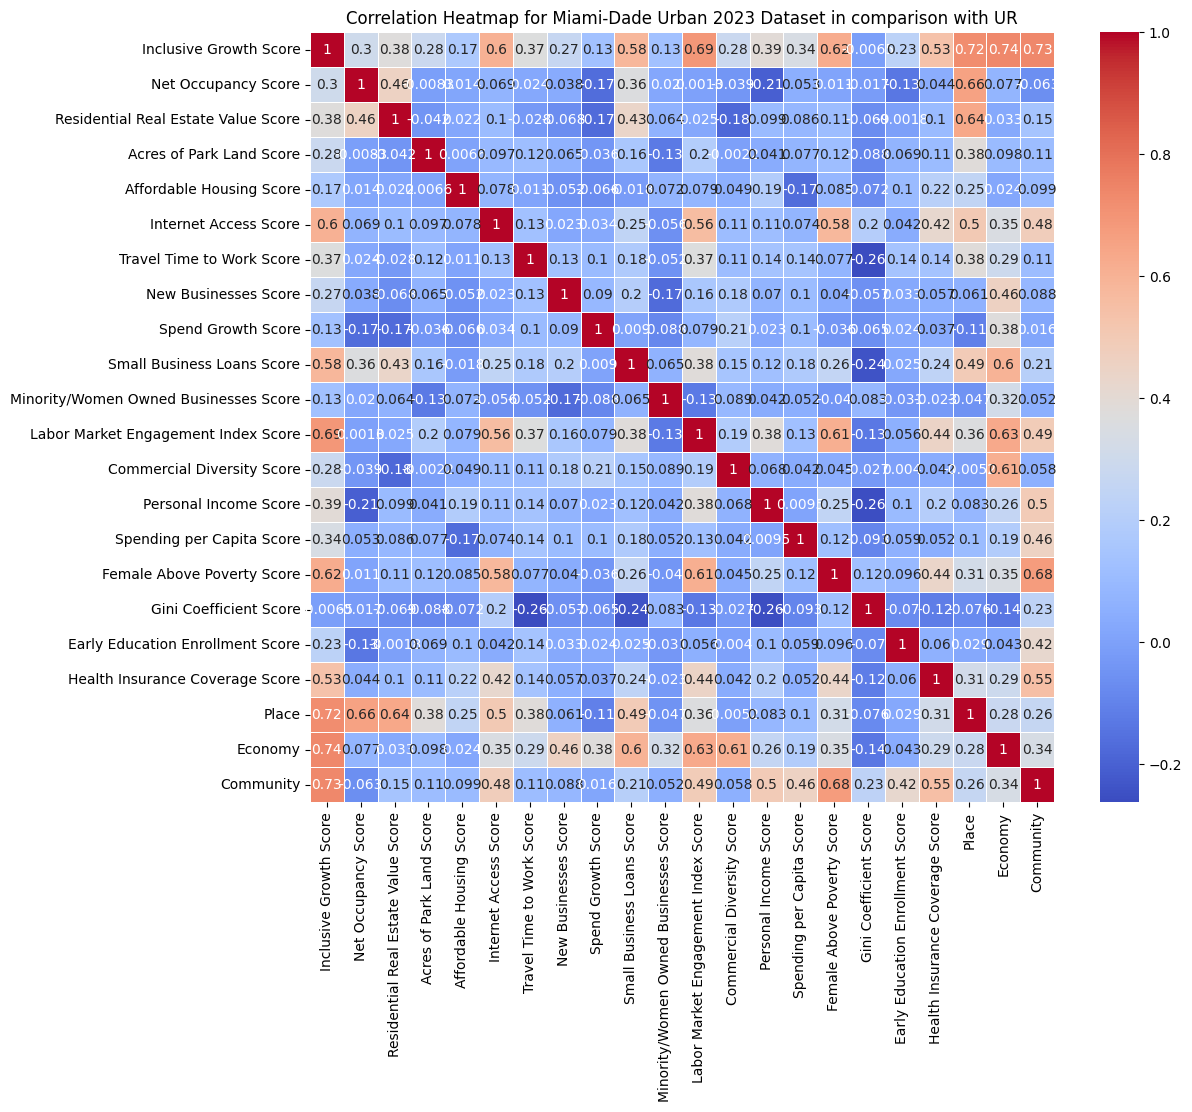

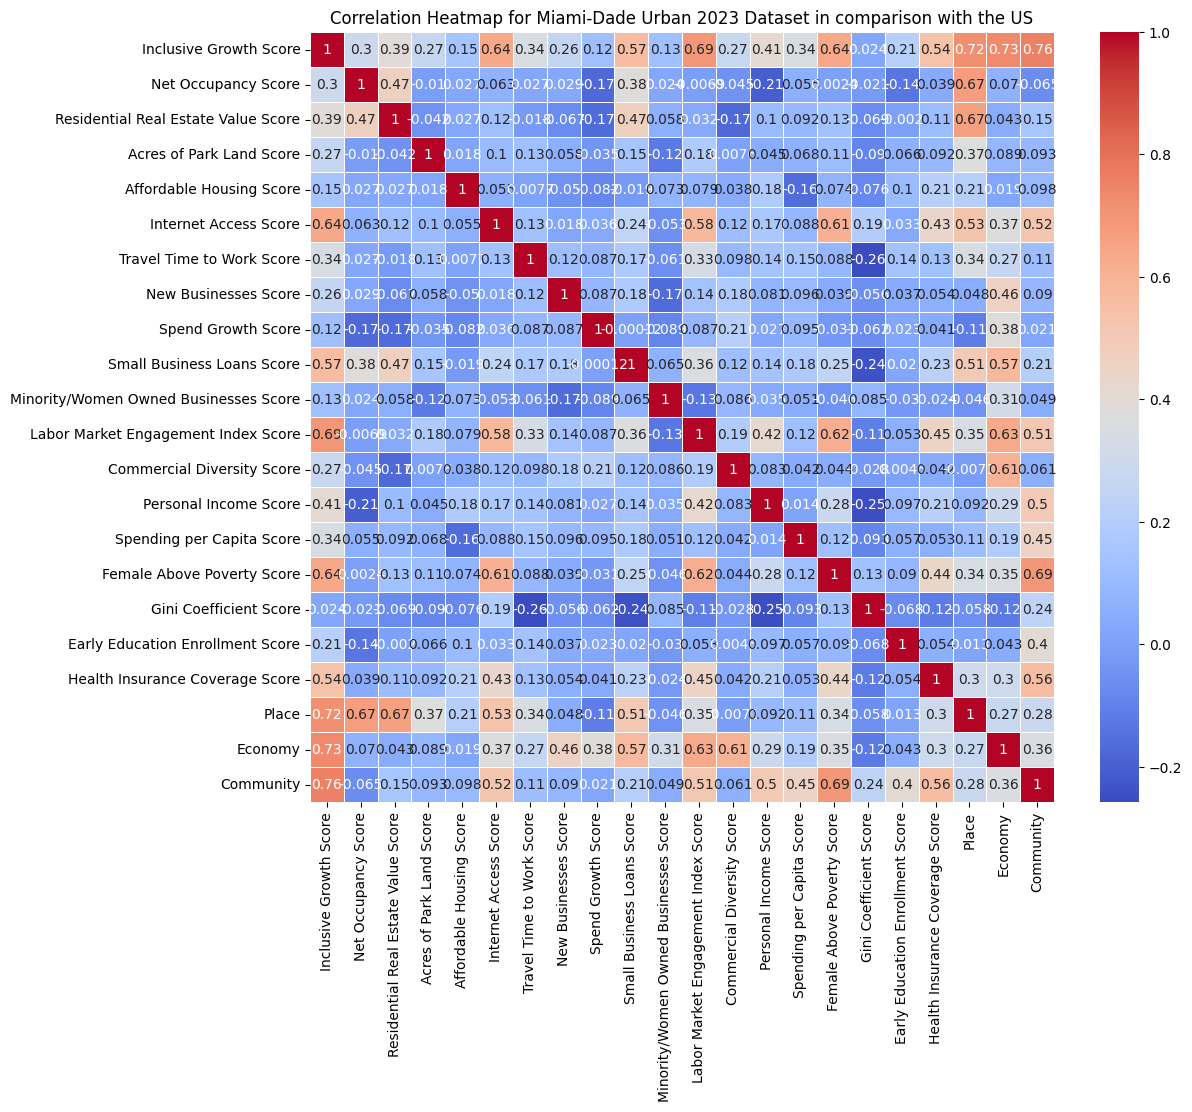

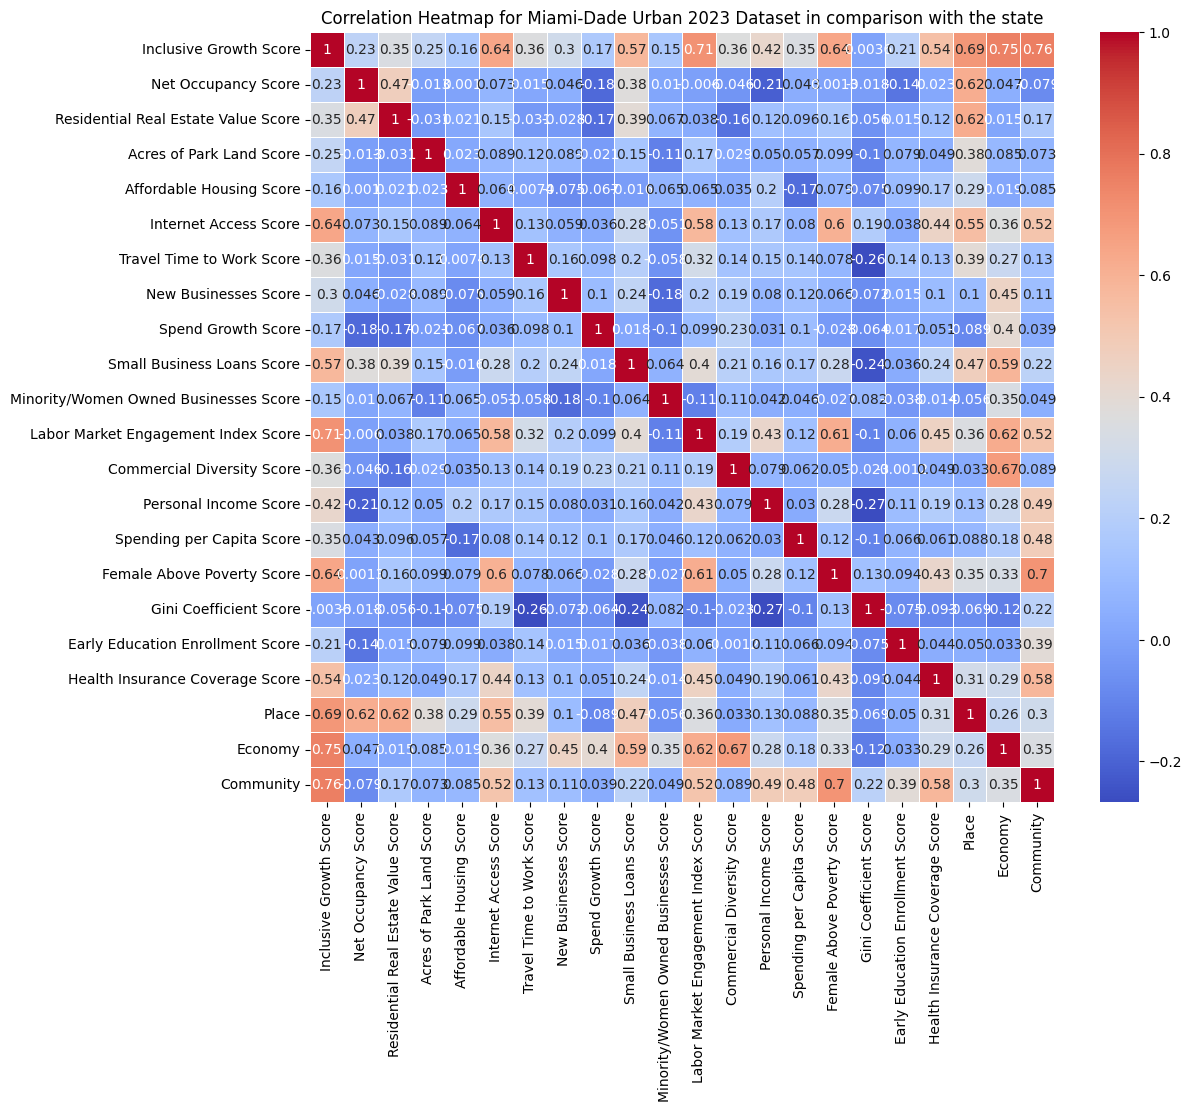

In [ ]:
#Correlation between inclusive growth growth score and the individual

# Columns to include in the heatmap
columns_for_heatmap = [
    'Inclusive Growth Score', 'Net Occupancy Score', 'Residential Real Estate Value Score',
    'Acres of Park Land Score', 'Affordable Housing Score', 'Internet Access Score',
    'Travel Time to Work Score', 'New Businesses Score', 'Spend Growth Score',
    'Small Business Loans Score', 'Minority/Women Owned Businesses Score',
    'Labor Market Engagement Index Score', 'Commercial Diversity Score',
    'Personal Income Score', 'Spending per Capita Score', 'Female Above Poverty Score',
    'Gini Coefficient Score', 'Early Education Enrollment Score',
    'Health Insurance Coverage Score', 'Place', 'Economy', 'Community'
]

# Filtering the dataset to include only the columns interested
filtered_miami_UR_2023 = miami_2023UR[columns_for_heatmap].copy()
filtered_miami_US_2023 = miami_2023USA[columns_for_heatmap].copy()
filtered_miami_state_2023 = miami_2023state[columns_for_heatmap].copy()

# Calculate the correlation matrix
corr_matrix_UR = filtered_miami_UR_2023.corr()
corr_matrix_US = filtered_miami_US_2023.corr()
corr_matrix_state = filtered_miami_state_2023.corr()

# Plot the heatmap of the 2023 data in comparison with the Rural-Urban region
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_UR, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Miami-Dade Urban 2023 Dataset in comparison with UR')
plt.show()

# Plot the heatmap for 2023 in comparison with the US
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_US, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Miami-Dade Urban 2023 Dataset in comparison with the US')
plt.show()

# Plot the heatmap in comparison  with the state
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_state, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Miami-Dade Urban 2023 Dataset in comparison with the state')
plt.show()


Found Major 18 Parameters influencing the Inclusive Growth Score as a whole

Therefore, we find the correlation between the inclusive growth score and these 18 parameters


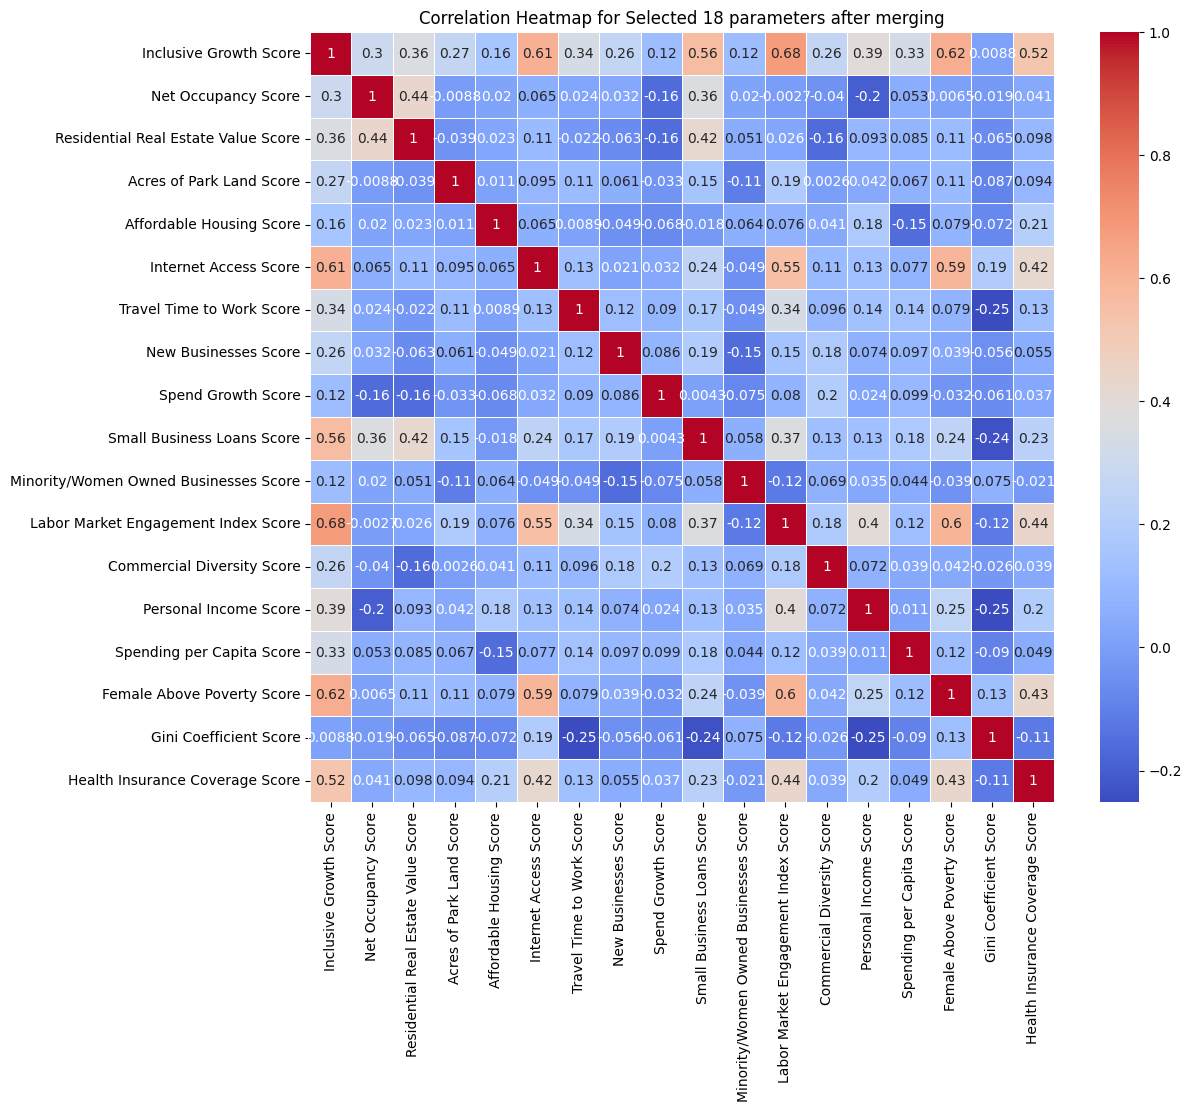

In [ ]:
#Correlation between inclusive growth growth score and the finalised 18 parameters for the combined datasets in 2023

# Automatically detect and average columns with the same root name (_x, _y, _z, etc.) because this is a merged data
for col in miami23_data.columns:
    if '_x' in col:
        # Removing the suffix "_x" to get the base name
        base_col = col[:-2]

        # Removing suffixes for _x _y and _z
        cols_to_average = [base_col + suffix for suffix in ['_x', '_y', '_z'] if (base_col + suffix) in miami23_data.columns]

        # Convert the averaged data to numeric
        miami23_data[cols_to_average] = miami23_data[cols_to_average].apply(pd.to_numeric, errors='coerce')

        #Calculate the averages
        miami23_data[base_col] = miami23_data[cols_to_average].mean(axis=1, skipna=True)


# Drop the columns with _x, _y, _z, etc. after averaging
miami23_data = miami23_data.drop(columns=[col for col in miami23_data.columns if '_x' in col or '_y' in col or '_z' in col])


# Define the correlation parameters
parameters_for_correlation = [
    'Inclusive Growth Score', 'Net Occupancy Score', 'Residential Real Estate Value Score',
    'Acres of Park Land Score', 'Affordable Housing Score', 'Internet Access Score',
    'Travel Time to Work Score', 'New Businesses Score', 'Spend Growth Score',
    'Small Business Loans Score', 'Minority/Women Owned Businesses Score',
    'Labor Market Engagement Index Score', 'Commercial Diversity Score',
    'Personal Income Score', 'Spending per Capita Score', 'Female Above Poverty Score',
    'Gini Coefficient Score', 'Health Insurance Coverage Score'
]

# Validating that all columns are numeric
miami23_data[parameters_for_correlation] = miami23_data[parameters_for_correlation].apply(pd.to_numeric, errors='coerce')

# Calculate correlation matrix
corr_matrix = miami23_data[parameters_for_correlation].corr()

#Plotting the heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Selected 18 parameters after merging')
plt.show()




Sorting the data based on the inclusive growth score and divide the dataset

In [ ]:
# Sorting the data based on 'Inclusive Growth Score_x' in ascending order
miami23_sorted_data = miami23_data.sort_values(by='Inclusive Growth Score', ascending=True)

# Divide the dataset based on the 'Inclusive Growth Score_x'
miami23_lowscore = miami23_sorted_data[(miami23_sorted_data['Inclusive Growth Score'] >= 23) & (miami23_sorted_data['Inclusive Growth Score'] <= 45)]
miami23_highscore = miami23_sorted_data[miami23_sorted_data['Inclusive Growth Score'] >= 46]

miami23_lowscore
#miami23_highscore


Census Tract FIPS code    N/A  Is an Opportunity Zone  \
201            1.208601e+10  244.0                     0.0   
44             1.208600e+10  289.0                     1.0   
110            1.208600e+10  288.0                     1.0   
112            1.208600e+10  342.0                     1.0   
97             1.208600e+10  279.0                     1.0   
..                      ...    ...                     ...   
449            1.208601e+10  111.0                     0.0   
82             1.208600e+10  286.0                     1.0   
169            1.208600e+10  390.0                     0.0   
295            1.208601e+10  101.0                     0.0   
353            1.208601e+10  437.0                     0.0   

     Inclusive Growth Score  Growth  Inclusion  Place  Place Growth  \
201                    23.5    25.5       21.0   16.0          22.0   
44                     24.5    24.0       24.5   19.0          25.5   
110                    27.5    33.5       21.0   24.0          29.0   
112                    27.5    35.5       19.0   24.0          28.0   
97                     28.5    37.0       20.5   33.0          38.5   
..                      ...     ...        ...    ...           ...   
449                    45.0    45.5       44.5   29.0          29.0   
82                     45.0    54.0       35.5   38.0          56.5   
169                    45.0    50.0       40.5   38.0          51.0   
295                    45.0    48.5       41.5   22.5          32.5   
353                    45.0    49.5       39.5   20.5          25.0   

     Place Inclusion  Net Occupancy Score  ...  Female Above Poverty Tract, %  \
201             11.0                 22.0  ...                           54.8   
44              12.0                 31.5  ...                           65.1   
110             19.5                 45.0  ...                           66.8   
112             20.0                 42.0  ...                           53.7   
97              27.5                 27.0  ...                           73.9   
..               ...                  ...  ...                            ...   
449             28.0                 33.5  ...                           84.3   
82              20.0                 68.0  ...                           70.2   
169             25.0                 61.5  ...                           96.3   
295             12.0                 33.0  ...                           89.1   
353             16.0                 33.5  ...                           83.6   

     Gini Coefficient Score  Gini Coefficient Base  Gini Coefficient Tract  \
201                    32.5                  41.65                    44.6   
44                     74.5                  41.65                    37.8   
110                    12.0                  41.65                    50.2   
112                    13.0                  41.65                    49.8   
97                     31.5                  41.65                    44.8   
..                      ...                    ...                     ...   
449                    47.0                  41.65                    42.2   
82                     76.5                  41.65                    37.5   
169                    13.0                  41.65                    49.7   
295                    59.0                  41.65                    40.3   
353                    78.5                  41.65                    37.0   

     Early Education Enrollment Score  Early Education Enrollment Base, %  \
201                         59.887538                                27.2   
44                          59.887538                                27.2   
110                         59.887538                                27.2   
112                         38.000000                                27.2   
97                          60.500000                                27.2   
..                                .

Plots to show the relationship between the inclusive growth score and other parameters

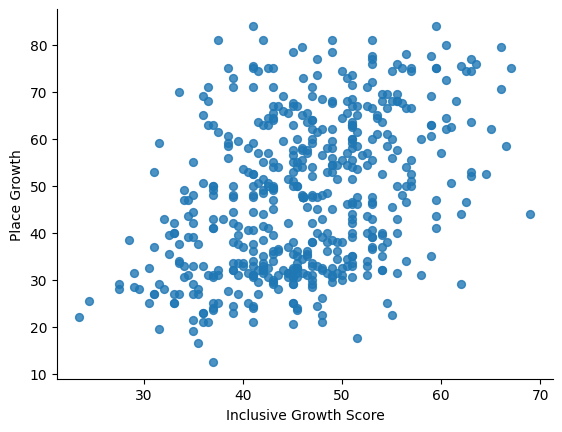

In [ ]:
#Plots of inclusive growth score against Place Growth
miami23_data.plot(kind='scatter', x='Inclusive Growth Score', y='Place Growth', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

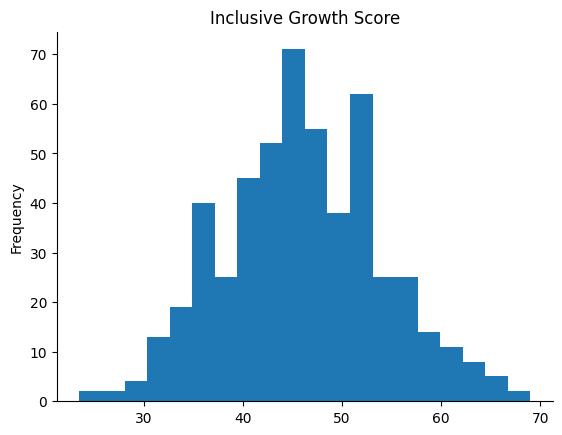

In [ ]:
#Plot of frequesncy of the inclusive growth score
miami23_data['Inclusive Growth Score'].plot(kind='hist', bins=20, title='Inclusive Growth Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Miami 2020 Data Frames

In [ ]:
import pandas as pd

# File paths for the 2020 datasets (Urban, USA, and State)
M20_UR_path = '/content/drive/MyDrive/MasterCard Data Challenge/Data Sets/CSV_Versions/Miami-Dade_2020UR.csv'
M20_USA_path = '/content/drive/MyDrive/MasterCard Data Challenge/Data Sets/CSV_Versions/Miami-Dade_2020USA.csv'
M20_state_path = '/content/drive/MyDrive/MasterCard Data Challenge/Data Sets/CSV_Versions/Miami-Dade_2020state.csv'

# Load Data with the second row as header
miami_UR_2020 = pd.read_csv(M20_UR_path, header=1)
miami_USA_2020 = pd.read_csv(M20_USA_path, header=1)
miami_state_2020 = pd.read_csv(M20_state_path, header=1)

# Drop first row and reset index
miami_2020UR_df = miami_UR_2020.drop(0).reset_index(drop=True)
miami_2020state_df = miami_state_2020.drop(0).reset_index(drop=True)
miami_2020_USA_df = miami_USA_2020.drop(0).reset_index(drop=True)

# Merge the Urban and USA datasets on 'Census Tract FIPS code' (outer join)
M20_UR_US = pd.merge(miami_2020UR_df, miami_2020_USA_df, on='Census Tract FIPS code', how='outer')

# Merge the combined Urban-USA dataset with the State dataset on 'Census Tract FIPS code' (outer join)
miami20_data = pd.merge(M20_UR_US, miami_2020state_df, on='Census Tract FIPS code', how='outer')

# print(miami20_data.head())  # Display the first few rows of the merged data
# print(miami20_data.columns)  # Check the columns in the merged data

#miami20_data

# For each column in the DataFrame, fill the N/A values with the column's mean
miami20_data = miami20_data.apply(lambda col: col.fillna(col.mean()) if col.dtype != 'O' else col)
print(miami20_data.describe())
print(miami20_data.head())
miami20_data


# Drop columns that contain certain keywords
miami20_data = miami20_data.filter(regex='^(?!Spend Growth Base|Spend Growth Tract|County|State|Year)').copy()

# Replace N/A with 0 and 'Yes' with 1 in the 'Is an Opportunity Zone' column
miami20_data['Is an Opportunity Zone_x'] = miami20_data['Is an Opportunity Zone_x'].fillna(0).replace({'Yes': 1})

#Check data
miami20_data

            N/A_x  Census Tract FIPS code  Year_x  Inclusive Growth Score_x  \
count  518.000000            5.180000e+02   518.0                518.000000   
mean   258.500000            1.208603e+10  2020.0                 45.972441   
std    149.677988            1.356802e+05     0.0                  8.013482   
min      0.000000            1.208600e+10  2020.0                 22.000000   
25%    129.250000            1.208600e+10  2020.0                 40.000000   
50%    258.500000            1.208601e+10  2020.0                 45.972441   
75%    387.750000            1.208601e+10  2020.0                 52.000000   
max    517.000000            1.208698e+10  2020.0                 68.000000   

         Growth_x  Inclusion_x     Place_x  Place Growth_x  Place Inclusion_x  \
count  518.000000   518.000000  518.000000      518.000000         518.000000   
mean    52.007737    39.818533   43.324165       56.129921          31.220077   
std      9.370926    10.895756   10.145700   

<ipython-input-14-7b295893a190>:40: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  miami20_data['Is an Opportunity Zone_x'] = miami20_data['Is an Opportunity Zone_x'].fillna(0).replace({'Yes': 1})


N/A_x  Is an Opportunity Zone_x  Census Tract FIPS code  \
0    175.0                         0            1.208600e+10   
1    291.0                         1            1.208600e+10   
2    484.0                         0            1.208600e+10   
3      3.0                         0            1.208600e+10   
4     30.0                         0            1.208600e+10   
..     ...                       ...                     ...   
513  173.0                         0            1.208698e+10   
514  130.0                         0            1.208698e+10   
515  306.0                         1            1.208698e+10   
516  245.0                         0            1.208698e+10   
517  121.0                         0            1.208698e+10   

     Inclusive Growth Score_x  Growth_x  Inclusion_x    Place_x  \
0                   46.000000      41.0         52.0  34.000000   
1                   40.000000      49.0         32.0  38.000000   
2                   54.000000      65.0         43.0  36.000000   
3                   42.000000      46.0         39.0  43.000000   
4                   46.000000      55.0         36.0  42.000000   
..                        ...       ...          ...        ...   
513                 45.972441      49.0         50.0  43.324165   
514                 34.000000      35.0         34.0  58.000000   
515                 45.972441      29.0         54.0  43.324165   
516                 45.972441       0.0         48.0  43.324165   
517                 45.972441      61.0         45.0  72.000000   

     Place Growth_x  Place Inclusion_x  Net Occupancy Score_x  ...  \
0         28.000000               40.0              28.000000  ...   
1         45.000000               32.0              61.000000  ...   
2         54.000000               17.0              48.000000  ...   
3         64.000000               22.0              48.000000  ...   
4         42.000000               42.0               5.000000  ...   
..              ...                ...                    ...  ...   
513       56.129921              100.0              54.531496  ...   
514       65.000000               50.0              65.000000  ...   
515       56.129921               52.0              54.531496  ...   
516       56.129921               95.0              54.531496  ...   
517       56.129921               72.0              54.531496  ...   

     Female Above Poverty Tract, %  Gini Coefficient Score  \
0                        88.000000                27.00000   
1                        72.500000                 9.00000   
2                        90.300000                15.00000   
3                        89.700000                 0.00000   
4                        88.300000                 0.00000   
..                             ...                     ...   
513                      79.050489                44.83432   
514                       2.700000               100.00000   
515                      79.050489                44.83432   
516                      79.050489                44.83432   
517                       0.000000                44.83432   

     Gini Coefficient Base  Gini Coefficient Tract  \
0                     42.7               46.900000   
1                     42.7               52.700000   
2                     42.7               50.400000   
3                     42.7               63.000000   
4                     42.7               68.000000   
..                     ...                     ...   
513                   42.7               44.800197   
514                   42.7               23.800000   
515                   42.7               44.800197   
516                   42.7               44.800197   
517                   42.7               44.800197   

     Early Education Enrollment Score  Early Education Enrollment Base, %  \
0                           70.000000                                24.6   
1                            7.000000     

Plotting the Correlation matrix to analyse correlation coefficients for the pillars

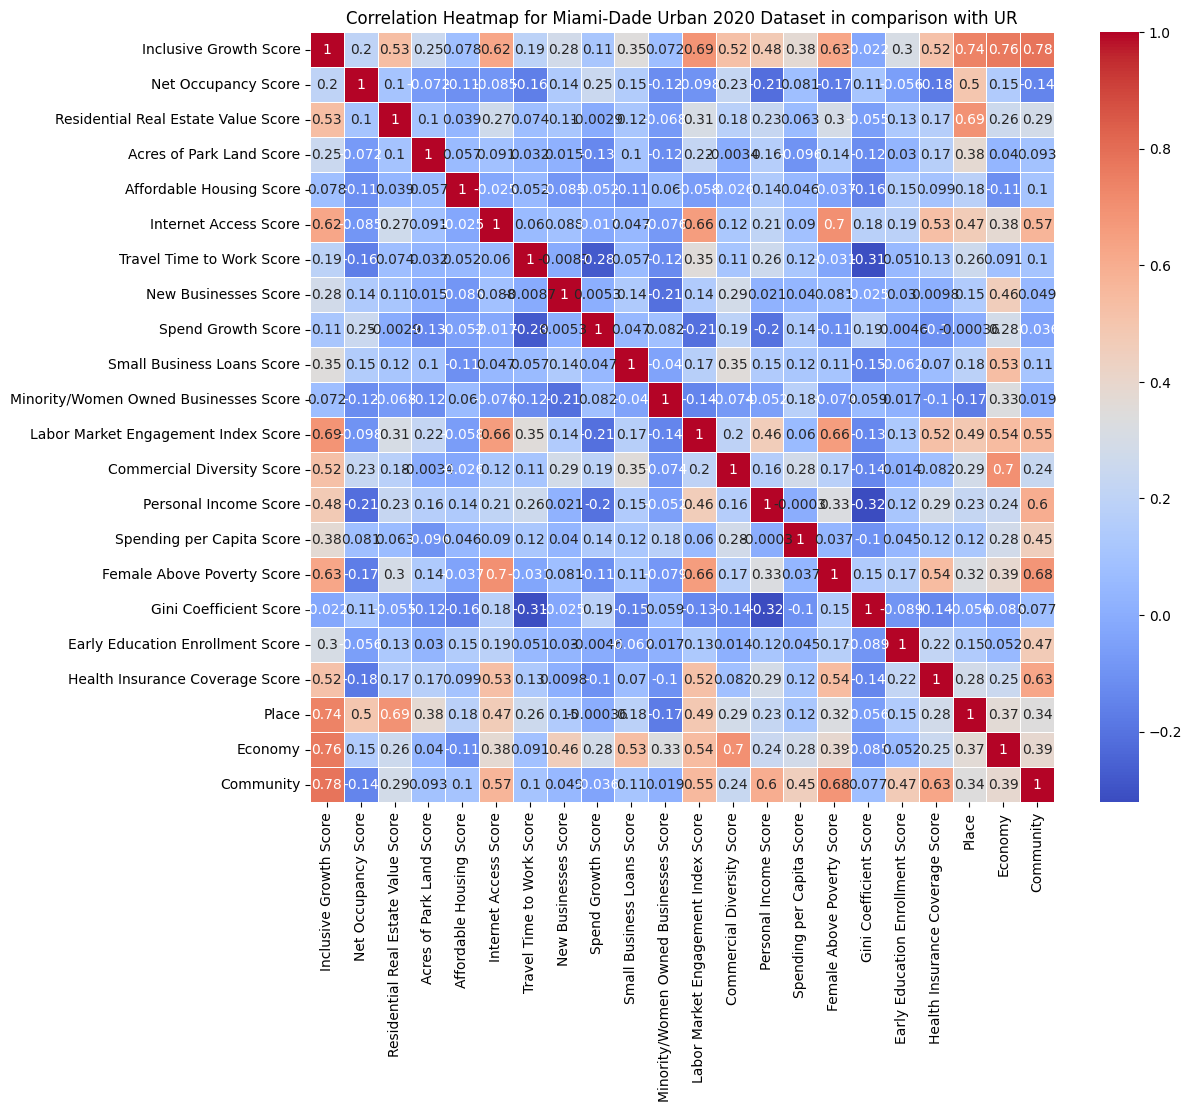

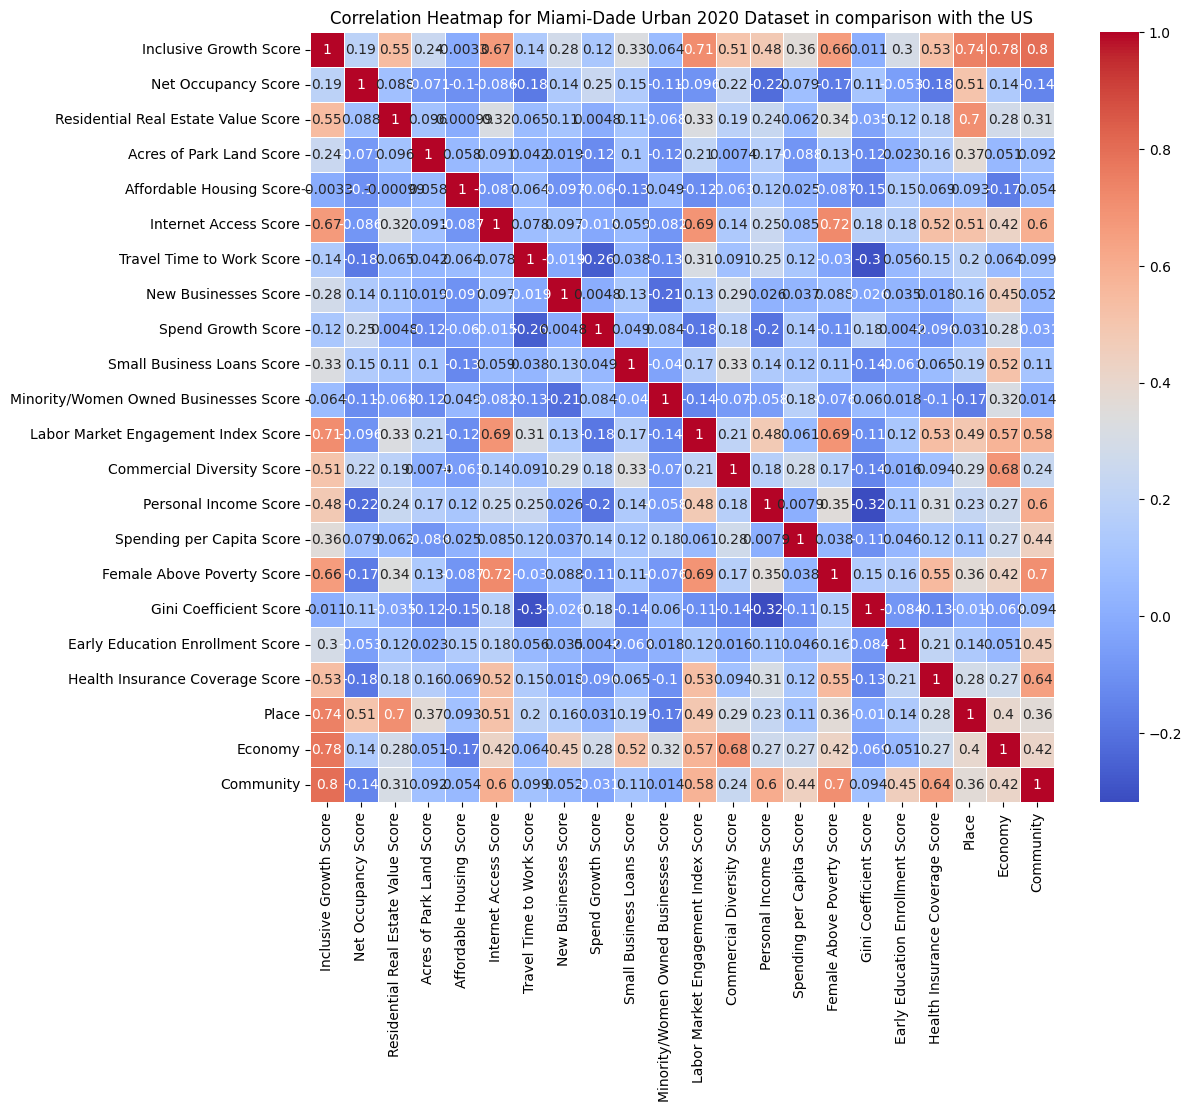

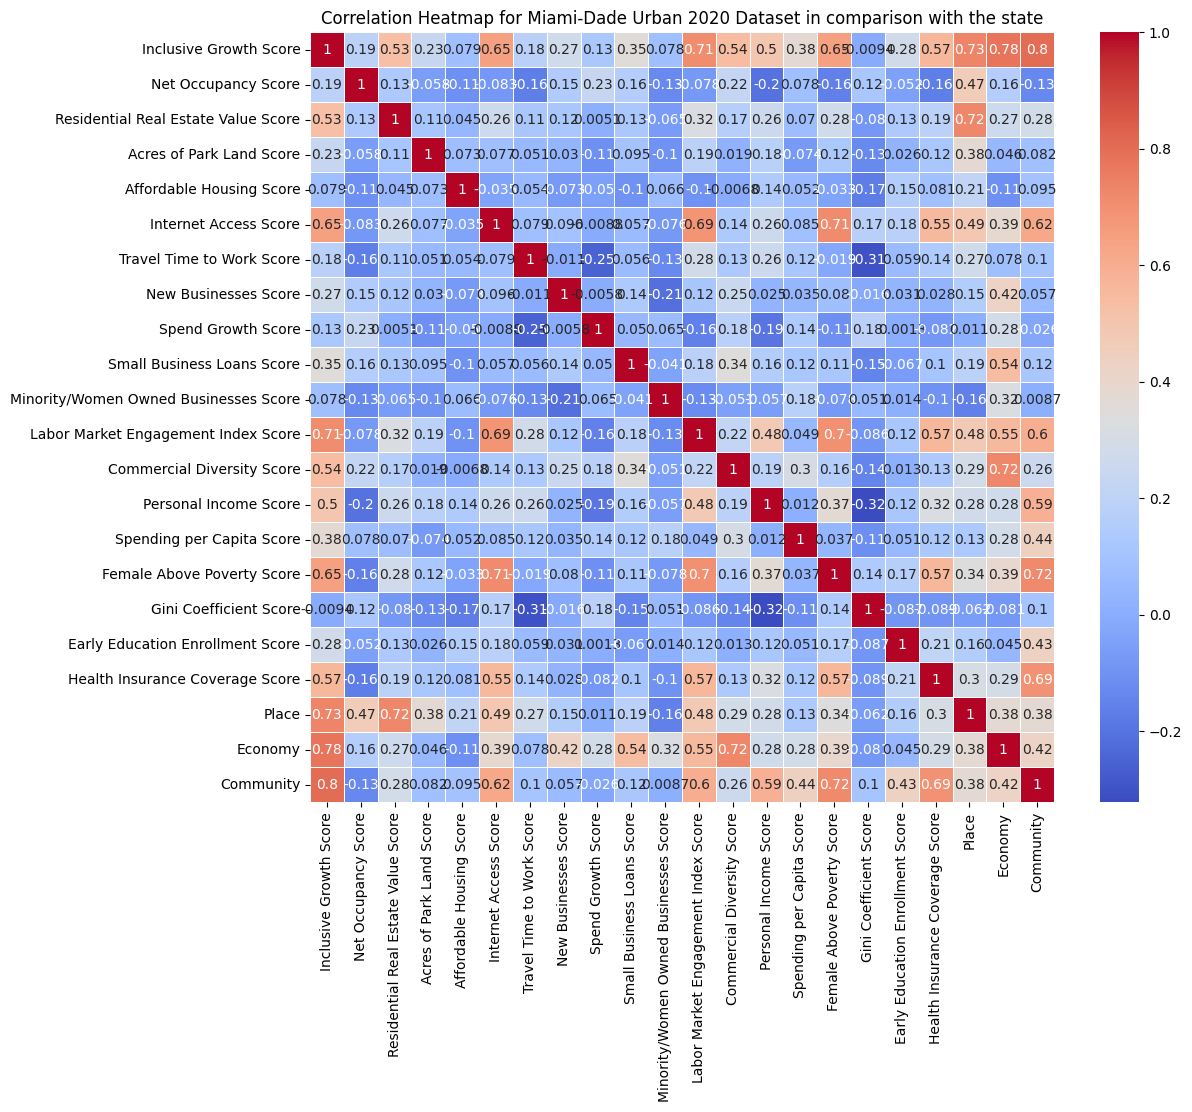

In [ ]:
#Correlation between inclusive growth growth score and the individual

# Columns to include in the heatmap
columns_for_heatmap = [
    'Inclusive Growth Score', 'Net Occupancy Score', 'Residential Real Estate Value Score',
    'Acres of Park Land Score', 'Affordable Housing Score', 'Internet Access Score',
    'Travel Time to Work Score', 'New Businesses Score', 'Spend Growth Score',
    'Small Business Loans Score', 'Minority/Women Owned Businesses Score',
    'Labor Market Engagement Index Score', 'Commercial Diversity Score',
    'Personal Income Score', 'Spending per Capita Score', 'Female Above Poverty Score',
    'Gini Coefficient Score', 'Early Education Enrollment Score',
    'Health Insurance Coverage Score', 'Place', 'Economy', 'Community'
]

# Filter the dataset to include only the selected columns
filtered_miami_UR_2020 = miami_2020UR_df[columns_for_heatmap].copy()
filtered_miami_US_2020 = miami_2020_USA_df[columns_for_heatmap].copy()
filtered_miami_state_2020 = miami_2020state_df[columns_for_heatmap].copy()

# Calculate the correlation matrix
corr_matrix_UR = filtered_miami_UR_2020.corr()
corr_matrix_US = filtered_miami_US_2020.corr()
corr_matrix_state = filtered_miami_state_2020.corr()

# Plot the heatmap to compare with  Urban
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_UR, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Miami-Dade Urban 2020 Dataset in comparison with UR')
plt.show()

# Plot the (US)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_US, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Miami-Dade Urban 2020 Dataset in comparison with the US')
plt.show()

# Plot the heatmap(state)
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_state, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Miami-Dade Urban 2020 Dataset in comparison with the state')
plt.show()


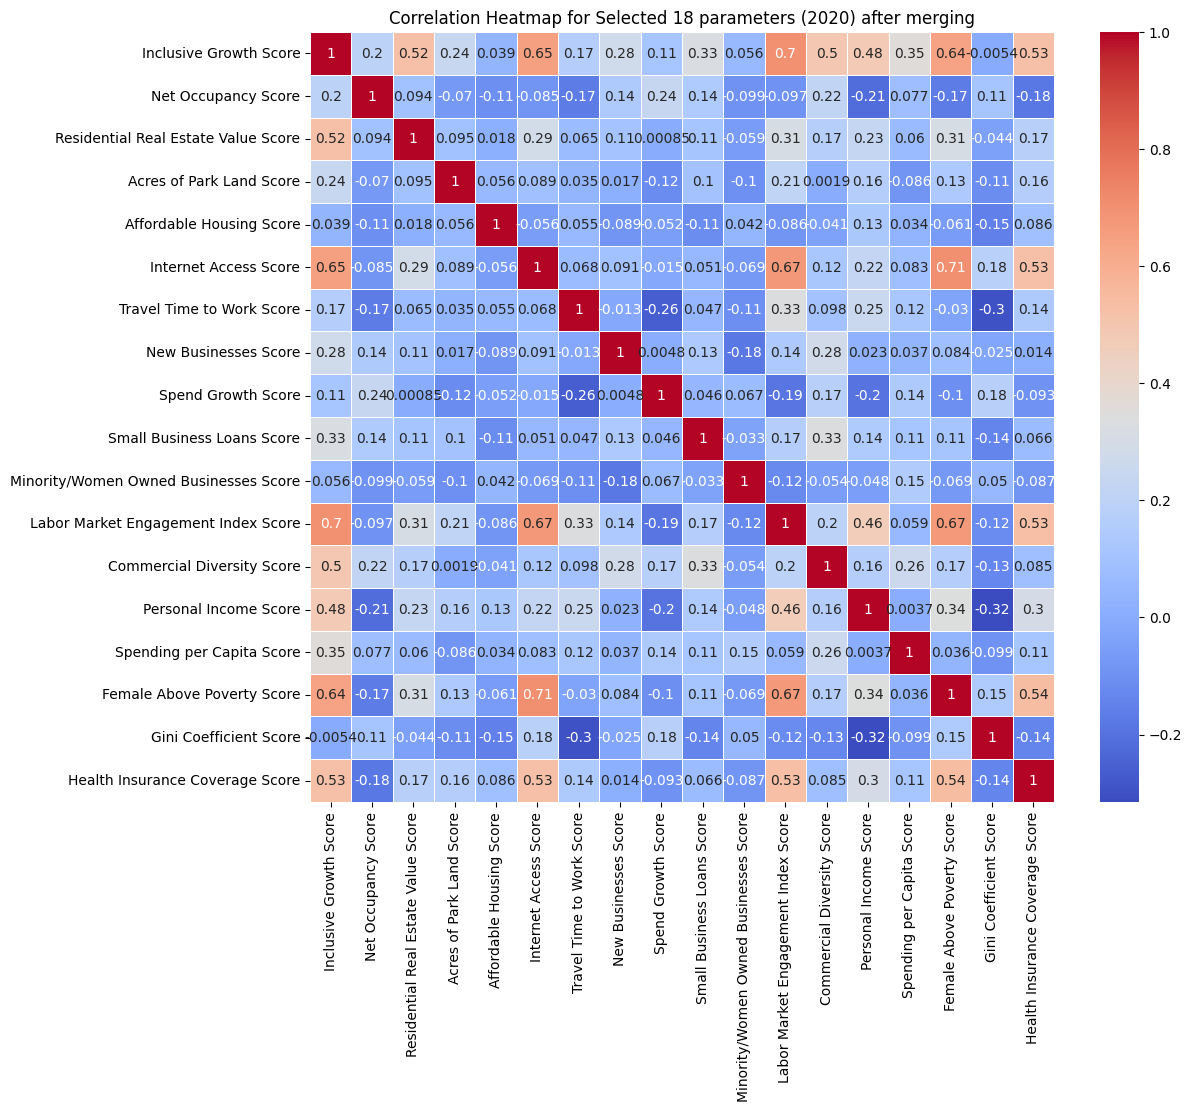

In [ ]:
#Get the averages and plots the correlation matrix to analyse the data

for col in miami20_data.columns:
    if '_x' in col:
        #Get the base name by removing the _x suffix
        base_col = col[:-2]
        # Average columns that share the same root name (_x, _y, _z)
        cols_to_average = [base_col + suffix for suffix in ['_x', '_y', '_z'] if (base_col + suffix) in miami20_data.columns]

        # COnverting the columns to numeric before averaging
        miami20_data[cols_to_average] = miami20_data[cols_to_average].apply(pd.to_numeric, errors='coerce')

        # Calculate the averges
        miami20_data[base_col] = miami20_data[cols_to_average].mean(axis=1, skipna=True)

# Drop the columns with _x, _y, _z, etc. after averaging for 2020 data
miami20_data = miami20_data.drop(columns=[col for col in miami20_data.columns if '_x' in col or '_y' in col or '_z' in col])

# List of the 18 parameters to include in the correlation matrix for 2020
parameters_for_correlation_2020 = [
    'Inclusive Growth Score', 'Net Occupancy Score', 'Residential Real Estate Value Score',
    'Acres of Park Land Score', 'Affordable Housing Score', 'Internet Access Score',
    'Travel Time to Work Score', 'New Businesses Score', 'Spend Growth Score',
    'Small Business Loans Score', 'Minority/Women Owned Businesses Score',
    'Labor Market Engagement Index Score', 'Commercial Diversity Score',
    'Personal Income Score', 'Spending per Capita Score', 'Female Above Poverty Score',
    'Gini Coefficient Score', 'Health Insurance Coverage Score'
]

# all columns are numeric before correlation for 2020
miami20_data[parameters_for_correlation_2020] = miami20_data[parameters_for_correlation_2020].apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix for the 18 parameters in 2020
corr_matrix_2020 = miami20_data[parameters_for_correlation_2020].corr()

# Plot the heatmap for the correlation matrix for 2020
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_2020, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Selected 18 parameters (2020) after merging')
plt.show()


# Miami 2017 Data Frames

In [ ]:
import pandas as pd

# File paths for the 2017 datasets (Urban, USA, and State)
M17_UR_path = '/content/drive/MyDrive/MasterCard Data Challenge/Data Sets/CSV_Versions/Miami-Dade_2017UR.csv'
M17_USA_path = '/content/drive/MyDrive/MasterCard Data Challenge/Data Sets/CSV_Versions/Miami-Dade_2017US.csv'
M17_state_path = '/content/drive/MyDrive/MasterCard Data Challenge/Data Sets/CSV_Versions/Miami-Dade_2017state.csv'

# Load Data with the second row as header
miami_UR_2017 = pd.read_csv(M17_UR_path, header=1)
miami_USA_2017 = pd.read_csv(M17_USA_path, header=1)
miami_state_2017 = pd.read_csv(M17_state_path, header=1)

# Drop first row and reset index for each dataset
miami_2017UR_df = miami_UR_2017.drop(0).reset_index(drop=True)
miami_2017USA_df = miami_USA_2017.drop(0).reset_index(drop=True)
miami_2017state_df = miami_state_2017.drop(0).reset_index(drop=True)

# Merge the Urban and USA datasets on 'Census Tract FIPS code' (outer join)
M17_UR_US = pd.merge(miami_2017UR_df, miami_2017USA_df, on='Census Tract FIPS code', how='outer')

# Merge the combined Urban-USA dataset with the State dataset on 'Census Tract FIPS code' (outer join)
miami17_data = pd.merge(M17_UR_US, miami_2017state_df, on='Census Tract FIPS code', how='outer')

# Print or verify the merged data if necessary
#print(miami17_data.head())
#print(miami17_data.columns)

miami17_data  # Return the final merged dataset


N/A_x Is an Opportunity Zone_x  Census Tract FIPS code  \
0    175.0                      NaN            1.208600e+10   
1    291.0                      Yes            1.208600e+10   
2    484.0                      NaN            1.208600e+10   
3      3.0                      NaN            1.208600e+10   
4     30.0                      NaN            1.208600e+10   
..     ...                      ...                     ...   
513  173.0                      NaN            1.208698e+10   
514  130.0                      NaN            1.208698e+10   
515  306.0                      Yes            1.208698e+10   
516  245.0                      NaN            1.208698e+10   
517  121.0                      NaN            1.208698e+10   

              County_x  State_x  Year_x  Inclusive Growth Score_x  Growth_x  \
0    Miami-Dade County  Florida  2017.0                      52.0      57.0   
1    Miami-Dade County  Florida  2017.0                      45.0      58.0   
2    Miami-Dade County  Florida  2017.0                      55.0      72.0   
3    Miami-Dade County  Florida  2017.0                      47.0      52.0   
4    Miami-Dade County  Florida  2017.0                      46.0      68.0   
..                 ...      ...     ...                       ...       ...   
513  Miami-Dade County  Florida  2017.0                       NaN      60.0   
514  Miami-Dade County  Florida  2017.0                      28.0      23.0   
515  Miami-Dade County  Florida  2017.0                       NaN      32.0   
516  Miami-Dade County  Florida  2017.0                       NaN      64.0   
517  Miami-Dade County  Florida  2017.0                       NaN      44.0   

     Inclusion_x  Place_x  ...  Female Above Poverty Tract, %  \
0           48.0     52.0  ...                           80.7   
1           32.0     46.0  ...                           65.3   
2           38.0     48.0  ...                           83.9   
3           42.0     24.0  ...                           87.4   
4           24.0     53.0  ...                           78.0   
..           ...      ...  ...                            ...   
513         50.0      NaN  ...                            NaN   
514         32.0     55.0  ...                            0.0   
515         58.0      NaN  ...                            NaN   
516         48.0      NaN  ...                            NaN   
517         43.0     72.0  ...                            0.0   

     Gini Coefficient Score  Gini Coefficient Base  Gini Coefficient Tract  \
0                       6.0                   42.4                    53.8   
1                      10.0                   42.4                    51.6   
2                      14.0                   42.4                    50.0   
3                       2.0                   42.4                    59.6   
4                       0.0                   42.4                    68.4   
..                      ...                    ...                     ...   
513                     NaN                   42.4                     NaN   
514                   100.0                   42.4                    22.3   
515                     NaN                   42.4                     NaN   
516                     NaN                   42.4                     NaN   
517                     NaN                   42.4                     NaN   

     Early Education Enrollment Score  Early Education Enrollment Base, %  \
0                                67.0                                25.0   
1                                24.0                                25.0   
2                                58.0                                25.0   
3                                34.0                                25.0   
4                                 3.0                                25.0   
..                                ...                                 ...   
513                               NaN     

In [ ]:
# For each column in the DataFrame, fill N/A values with the column's mean
miami17_data = miami17_data.apply(lambda col: col.fillna(col.mean()) if col.dtype != 'O' else col)
print(miami17_data.describe())
print(miami17_data.head())
miami17_data


# Drop columns that contain certain keywords
miami17_data = miami17_data.filter(regex='^(?!Spend Growth Base|Spend Growth Tract|County|State|Year)').copy()

# Replace NaN with 0 and 'Yes' with 1 in the 'Is an Opportunity Zone' column
miami17_data['Is an Opportunity Zone_x'] = miami17_data['Is an Opportunity Zone_x'].fillna(0).replace({'Yes': 1})

#Check data
miami17_data

            N/A_x  Census Tract FIPS code  Year_x  Inclusive Growth Score_x  \
count  518.000000            5.180000e+02   518.0                518.000000   
mean   258.500000            1.208603e+10  2017.0                 46.787402   
std    149.677988            1.356802e+05     0.0                  9.301633   
min      0.000000            1.208600e+10  2017.0                 22.000000   
25%    129.250000            1.208600e+10  2017.0                 40.000000   
50%    258.500000            1.208601e+10  2017.0                 46.000000   
75%    387.750000            1.208601e+10  2017.0                 52.000000   
max    517.000000            1.208698e+10  2017.0                 76.000000   

         Growth_x  Inclusion_x     Place_x  Place Growth_x  Place Inclusion_x  \
count  518.000000   518.000000  518.000000      518.000000         518.000000   
mean    53.382979    40.484556   42.836935       52.618110          33.693050   
std     11.010999    10.818833   11.875520   

<ipython-input-18-444ad6344e72>:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  miami17_data['Is an Opportunity Zone_x'] = miami17_data['Is an Opportunity Zone_x'].fillna(0).replace({'Yes': 1})


N/A_x  Is an Opportunity Zone_x  Census Tract FIPS code  \
0    175.0                         0            1.208600e+10   
1    291.0                         1            1.208600e+10   
2    484.0                         0            1.208600e+10   
3      3.0                         0            1.208600e+10   
4     30.0                         0            1.208600e+10   
..     ...                       ...                     ...   
513  173.0                         0            1.208698e+10   
514  130.0                         0            1.208698e+10   
515  306.0                         1            1.208698e+10   
516  245.0                         0            1.208698e+10   
517  121.0                         0            1.208698e+10   

     Inclusive Growth Score_x  Growth_x  Inclusion_x    Place_x  \
0                   52.000000      57.0         48.0  52.000000   
1                   45.000000      58.0         32.0  46.000000   
2                   55.000000      72.0         38.0  48.000000   
3                   47.000000      52.0         42.0  24.000000   
4                   46.000000      68.0         24.0  53.000000   
..                        ...       ...          ...        ...   
513                 46.787402      60.0         50.0  42.836935   
514                 28.000000      23.0         32.0  55.000000   
515                 46.787402      32.0         58.0  42.836935   
516                 46.787402      64.0         48.0  42.836935   
517                 46.787402      44.0         43.0  72.000000   

     Place Growth_x  Place Inclusion_x  Net Occupancy Score_x  ...  \
0          66.00000               39.0              70.000000  ...   
1          58.00000               33.0              76.000000  ...   
2          80.00000               16.0              75.000000  ...   
3          24.00000               23.0               9.000000  ...   
4          78.00000               28.0              67.000000  ...   
..              ...                ...                    ...  ...   
513        52.61811              100.0              59.746063  ...   
514        67.00000               43.0              67.000000  ...   
515        52.61811               52.0              59.746063  ...   
516        52.61811               95.0              59.746063  ...   
517        52.61811               72.0              59.746063  ...   

     Female Above Poverty Tract, %  Gini Coefficient Score  \
0                        80.700000                6.000000   
1                        65.300000               10.000000   
2                        83.900000               14.000000   
3                        87.400000                2.000000   
4                        78.000000                0.000000   
..                             ...                     ...   
513                      76.633268               43.844488   
514                       0.000000              100.000000   
515                      76.633268               43.844488   
516                      76.633268               43.844488   
517                       0.000000               43.844488   

     Gini Coefficient Base  Gini Coefficient Tract  \
0                     42.4               53.800000   
1                     42.4               51.600000   
2                     42.4               50.000000   
3                     42.4               59.600000   
4                     42.4               68.400000   
..                     ...                     ...   
513                   42.4               44.547835   
514                   42.4               22.300000   
515                   42.4               44.547835   
516                   42.4               44.547835   
517                   42.4               44.547835   

     Early Education Enrollment Score  Early Education Enrollment Base, %  \
0                           67.000000                                25.0   
1                           24.000000     

In [ ]:
import pandas as pd

# File paths for the 2018 datasets
M18_UR_path = '/content/drive/MyDrive/MasterCard Data Challenge/Data Sets/CSV_Versions/Miami-Dade_2018UR.csv'
M18_USA_path = '/content/drive/MyDrive/MasterCard Data Challenge/Data Sets/CSV_Versions/Miami-Dade_2018USA.csv'
M18_state_path = '/content/drive/MyDrive/MasterCard Data Challenge/Data Sets/CSV_Versions/Miami-Dade_2018state.csv'

# Load Data with the second row as header
miami_UR_2018 = pd.read_csv(M18_UR_path, header=1)
miami_USA_2018 = pd.read_csv(M18_USA_path, header=1)
miami_state_2018 = pd.read_csv(M18_state_path, header=1)

# Drop the first row and reset index
miami_2018UR_df = miami_UR_2018.drop(0).reset_index(drop=True)
miami_2018USA_df = miami_USA_2018.drop(0).reset_index(drop=True)
miami_2018state_df = miami_state_2018.drop(0).reset_index(drop=True)

# Merge the Urban and USA datasets on 'Census Tract FIPS code' (outer join)
M18_UR_US = pd.merge(miami_2018UR_df, miami_2018USA_df, on='Census Tract FIPS code', how='outer')

# Merge the combined Urban-USA dataset with the State dataset on 'Census Tract FIPS code' (outer join)
miami18_data = pd.merge(M18_UR_US, miami_2018state_df, on='Census Tract FIPS code', how='outer')

# Fill NaN values with the mean for numeric columns
miami18_data = miami18_data.apply(lambda col: col.fillna(col.mean()) if col.dtype != 'O' else col)

# Drop columns with specific keywords
miami18_data = miami18_data.filter(regex='^(?!Spend Growth Base|Spend Growth Tract|County|State|Year)').copy()

# Handle the 'Is an Opportunity Zone' column (replace NaN with 0 and 'Yes' with 1)
miami18_data['Is an Opportunity Zone_x'] = miami18_data['Is an Opportunity Zone_x'].fillna(0).replace({'Yes': 1})

# Automatically detect and average columns with the same root name (_x, _y, _z)
for col in miami18_data.columns:
    if '_x' in col:
        base_col = col[:-2]  # Remove the suffix "_x" to get the base name
        # Average columns that share the same root name (_x, _y, _z)
        cols_to_average = [base_col + suffix for suffix in ['_x', '_y', '_z'] if (base_col + suffix) in miami18_data.columns]
        miami18_data[cols_to_average] = miami18_data[cols_to_average].apply(pd.to_numeric, errors='coerce')
        miami18_data[base_col] = miami18_data[cols_to_average].mean(axis=1, skipna=True)

# Drop the columns with _x, _y, _z after averaging
miami18_data = miami18_data.drop(columns=[col for col in miami18_data.columns if '_x' in col or '_y' in col or '_z' in col])

# Check the cleaned data
print(miami18_data.describe())
print(miami18_data.head())


<ipython-input-19-587e5e6dd39f>:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  miami18_data['Is an Opportunity Zone_x'] = miami18_data['Is an Opportunity Zone_x'].fillna(0).replace({'Yes': 1})


       Census Tract FIPS code         N/A  Is an Opportunity Zone  \
count            5.180000e+02  518.000000              518.000000   
mean             1.208603e+10  258.500000                0.129344   
std              1.356802e+05  149.677988                0.335904   
min              1.208600e+10    0.000000                0.000000   
25%              1.208600e+10  129.250000                0.000000   
50%              1.208601e+10  258.500000                0.000000   
75%              1.208601e+10  387.750000                0.000000   
max              1.208698e+10  517.000000                1.000000   

       Inclusive Growth Score      Growth  Inclusion       Place  \
count              518.000000  518.000000  518.00000  518.000000   
mean                47.457677   54.323985   40.82529   43.027505   
std                  9.113707   10.573907   10.93620   11.327601   
min                 24.000000   23.000000   17.50000   16.500000   
25%                 40.500000   46.625

In [ ]:
import pandas as pd

# File paths for the 2019 datasets (Urban, USA, and State)
M19_UR_path = '/content/drive/MyDrive/MasterCard Data Challenge/Data Sets/CSV_Versions/Miami-Dade_2019UR.csv'
M19_USA_path = '/content/drive/MyDrive/MasterCard Data Challenge/Data Sets/CSV_Versions/Miami-Dade_2019USA.csv'
M19_state_path = '/content/drive/MyDrive/MasterCard Data Challenge/Data Sets/CSV_Versions/Miami-Dade_2019state.csv'

# Load Data with the second row as header
miami_UR_2019 = pd.read_csv(M19_UR_path, header=1)
miami_USA_2019 = pd.read_csv(M19_USA_path, header=1)
miami_state_2019 = pd.read_csv(M19_state_path, header=1)

# Drop the first row and reset index
miami_2019UR_df = miami_UR_2019.drop(0).reset_index(drop=True)
miami_2019USA_df = miami_USA_2019.drop(0).reset_index(drop=True)
miami_2019state_df = miami_state_2019.drop(0).reset_index(drop=True)

# Merge the Urban and USA datasets on 'Census Tract FIPS code' (outer join)
M19_UR_US = pd.merge(miami_2019UR_df, miami_2019USA_df, on='Census Tract FIPS code', how='outer')

# Merge the combined Urban-USA dataset with the State dataset on 'Census Tract FIPS code' (outer join)
miami19_data = pd.merge(M19_UR_US, miami_2019state_df, on='Census Tract FIPS code', how='outer')

# Fill NaN values with the mean for numeric columns
miami19_data = miami19_data.apply(lambda col: col.fillna(col.mean()) if col.dtype != 'O' else col)

# Drop columns with specific keywords like 'Spend Growth Base', 'Spend Growth Tract', 'County', 'State', and 'Year'
miami19_data = miami19_data.filter(regex='^(?!Spend Growth Base|Spend Growth Tract|County|State|Year)').copy()

# Handle the 'Is an Opportunity Zone' column (replace NaN with 0 and 'Yes' with 1)
miami19_data['Is an Opportunity Zone_x'] = miami19_data['Is an Opportunity Zone_x'].fillna(0).replace({'Yes': 1})

# Automatically detect and average columns with the same root name (_x, _y, _z)
for col in miami19_data.columns:
    if '_x' in col:
        base_col = col[:-2]  # Remove the suffix "_x" to get the base name
        # Average columns that share the same root name (_x, _y, _z)
        cols_to_average = [base_col + suffix for suffix in ['_x', '_y', '_z'] if (base_col + suffix) in miami19_data.columns]
        miami19_data[cols_to_average] = miami19_data[cols_to_average].apply(pd.to_numeric, errors='coerce')
        miami19_data[base_col] = miami19_data[cols_to_average].mean(axis=1, skipna=True)

# Drop the columns with _x, _y, _z after averaging
miami19_data = miami19_data.drop(columns=[col for col in miami19_data.columns if '_x' in col or '_y' in col or '_z' in col])

# Check the cleaned data
print(miami19_data.describe())
print(miami19_data.head())


<ipython-input-20-a76aa2973b28>:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  miami19_data['Is an Opportunity Zone_x'] = miami19_data['Is an Opportunity Zone_x'].fillna(0).replace({'Yes': 1})


       Census Tract FIPS code         N/A  Is an Opportunity Zone  \
count            5.180000e+02  518.000000              518.000000   
mean             1.208603e+10  258.500000                0.129344   
std              1.356802e+05  149.677988                0.335904   
min              1.208600e+10    0.000000                0.000000   
25%              1.208600e+10  129.250000                0.000000   
50%              1.208601e+10  258.500000                0.000000   
75%              1.208601e+10  387.750000                0.000000   
max              1.208698e+10  517.000000                1.000000   

       Inclusive Growth Score      Growth   Inclusion       Place  \
count              518.000000  518.000000  518.000000  518.000000   
mean                47.771654   54.942940   40.675676   44.083497   
std                  8.610530    9.928718   10.973505   10.675602   
min                 22.000000    8.000000   15.000000   15.000000   
25%                 41.500000   4

In [ ]:
import pandas as pd

# File paths for the 2021 datasets (Urban, USA, and State)
M21_UR_path = '/content/drive/MyDrive/MasterCard Data Challenge/Data Sets/CSV_Versions/Miami-Dade_2021UR.csv'
M21_USA_path = '/content/drive/MyDrive/MasterCard Data Challenge/Data Sets/CSV_Versions/Miami-Dade_2021USA.csv'
M21_state_path = '/content/drive/MyDrive/MasterCard Data Challenge/Data Sets/CSV_Versions/Miami-Dade_2021state.csv'

# Load Data with the second row as header
miami_UR_2021 = pd.read_csv(M21_UR_path, header=1)
miami_USA_2021 = pd.read_csv(M21_USA_path, header=1)
miami_state_2021 = pd.read_csv(M21_state_path, header=1)

# Drop the first row and reset index
miami_2021UR_df = miami_UR_2021.drop(0).reset_index(drop=True)
miami_2021USA_df = miami_USA_2021.drop(0).reset_index(drop=True)
miami_2021state_df = miami_state_2021.drop(0).reset_index(drop=True)

# Merge the Urban and USA datasets on 'Census Tract FIPS code' (outer join)
M21_UR_US = pd.merge(miami_2021UR_df, miami_2021USA_df, on='Census Tract FIPS code', how='outer')

# Merge the combined Urban-USA dataset with the State dataset on 'Census Tract FIPS code' (outer join)
miami21_data = pd.merge(M21_UR_US, miami_2021state_df, on='Census Tract FIPS code', how='outer')

# Fill NaN values with the mean for numeric columns
miami21_data = miami21_data.apply(lambda col: col.fillna(col.mean()) if col.dtype != 'O' else col)

# Drop columns that contain specific keywords like 'Spend Growth Base', 'Spend Growth Tract', 'County', 'State', 'Year'
miami21_data = miami21_data.filter(regex='^(?!Spend Growth Base|Spend Growth Tract|County|State|Year)').copy()

# Handle the 'Is an Opportunity Zone' column (replace NaN with 0 and 'Yes' with 1)
miami21_data['Is an Opportunity Zone_x'] = miami21_data['Is an Opportunity Zone_x'].fillna(0).replace({'Yes': 1})

# Automatically detect and average columns with the same root name (_x, _y, _z)
for col in miami21_data.columns:
    if '_x' in col:
        base_col = col[:-2]  # Remove the suffix "_x" to get the base name
        # Average columns that share the same root name (_x, _y, _z)
        cols_to_average = [base_col + suffix for suffix in ['_x', '_y', '_z'] if (base_col + suffix) in miami21_data.columns]
        miami21_data[cols_to_average] = miami21_data[cols_to_average].apply(pd.to_numeric, errors='coerce')
        miami21_data[base_col] = miami21_data[cols_to_average].mean(axis=1, skipna=True)

# Drop the columns with _x, _y, _z after averaging
miami21_data = miami21_data.drop(columns=[col for col in miami21_data.columns if '_x' in col or '_y' in col or '_z' in col])

# Check the cleaned data
print(miami21_data.describe())
print(miami21_data.head())


<ipython-input-21-672f566bab90>:31: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  miami21_data['Is an Opportunity Zone_x'] = miami21_data['Is an Opportunity Zone_x'].fillna(0).replace({'Yes': 1})


       Census Tract FIPS code         N/A  Is an Opportunity Zone  \
count            5.180000e+02  518.000000              518.000000   
mean             1.208603e+10  258.500000                0.129344   
std              1.356802e+05  149.677988                0.335904   
min              1.208600e+10    0.000000                0.000000   
25%              1.208600e+10  129.250000                0.000000   
50%              1.208601e+10  258.500000                0.000000   
75%              1.208601e+10  387.750000                0.000000   
max              1.208698e+10  517.000000                1.000000   

       Inclusive Growth Score      Growth   Inclusion       Place  \
count              518.000000  518.000000  518.000000  518.000000   
mean                47.268072   53.920696   41.281853   40.359252   
std                  7.876950    9.522776   11.509171   11.289721   
min                 27.000000   20.000000   13.000000   10.000000   
25%                 41.625000   4

In [ ]:
import pandas as pd

# Paths for the 2022 datasets
M22_UR_path = '/content/drive/MyDrive/MasterCard Data Challenge/Data Sets/CSV_Versions/Miame-Dade_2022UR.csv'
M22_USA_path = '/content/drive/MyDrive/MasterCard Data Challenge/Data Sets/CSV_Versions/Miame-Dade_2022USA.csv'
M22_state_path = '/content/drive/MyDrive/MasterCard Data Challenge/Data Sets/CSV_Versions/Miame-Dade_2022state.csv'

# Load the datasets for 2022
miami_UR_2022 = pd.read_csv(M22_UR_path, header=1)
miami_2022UR_df = pd.DataFrame(miami_UR_2022).drop(0).reset_index(drop=True)

miami_USA_2022 = pd.read_csv(M22_USA_path, header=1)
miami_2022USA_df = pd.DataFrame(miami_USA_2022).drop(0).reset_index(drop=True)

miami_state_2022 = pd.read_csv(M22_state_path, header=1)
miami_2022state_df = pd.DataFrame(miami_state_2022).drop(0).reset_index(drop=True)

# Merge the datasets on 'Census Tract FIPS code'
M22_UR_US = pd.merge(miami_2022UR_df, miami_2022USA_df, on='Census Tract FIPS code', how='outer')
miami22_data = pd.merge(M22_UR_US, miami_2022state_df, on='Census Tract FIPS code', how='outer')

# Fill NaN values with the mean for numeric columns
miami22_data = miami22_data.apply(lambda col: col.fillna(col.mean()) if col.dtype != 'O' else col)

# Drop columns with specific keywords
miami22_data = miami22_data.filter(regex='^(?!Spend Growth Base|Spend Growth Tract|County|State|Year)').copy()

# Handle the 'Is an Opportunity Zone' column (replace NaN with 0 and 'Yes' with 1)
miami22_data['Is an Opportunity Zone_x'] = miami22_data['Is an Opportunity Zone_x'].fillna(0).replace({'Yes': 1})

# Automatically detect and average columns with the same root name (_x, _y, _z)
for col in miami22_data.columns:
    if '_x' in col:
        base_col = col[:-2]  # Remove the suffix "_x" to get the base name
        # Average columns that share the same root name (_x, _y, _z)
        cols_to_average = [base_col + suffix for suffix in ['_x', '_y', '_z'] if (base_col + suffix) in miami22_data.columns]

        # Make sure all columns being averaged are numeric
        miami22_data[cols_to_average] = miami22_data[cols_to_average].apply(pd.to_numeric, errors='coerce')

        # Perform the averaging
        miami22_data[base_col] = miami22_data[cols_to_average].mean(axis=1, skipna=True)

# Drop the columns with _x, _y, _z after averaging
miami22_data = miami22_data.drop(columns=[col for col in miami22_data.columns if '_x' in col or '_y' in col or '_z' in col])

# Check data
print(miami22_data.describe())
print(miami22_data.head())


<ipython-input-22-5e6ad7ff2569>:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  miami22_data['Is an Opportunity Zone_x'] = miami22_data['Is an Opportunity Zone_x'].fillna(0).replace({'Yes': 1})


       Census Tract FIPS code         N/A  Is an Opportunity Zone  \
count            5.180000e+02  518.000000              518.000000   
mean             1.208603e+10  258.500000                0.129344   
std              1.356802e+05  149.677988                0.335904   
min              1.208600e+10    0.000000                0.000000   
25%              1.208600e+10  129.250000                0.000000   
50%              1.208601e+10  258.500000                0.000000   
75%              1.208601e+10  387.750000                0.000000   
max              1.208698e+10  517.000000                1.000000   

       Inclusive Growth Score      Growth   Inclusion       Place  \
count              518.000000  518.000000  518.000000  518.000000   
mean                48.248509   54.890716   41.896718   39.481336   
std                  7.524934    8.909721   11.441401   11.086269   
min                 26.000000    1.000000   12.500000   15.500000   
25%                 43.000000   5

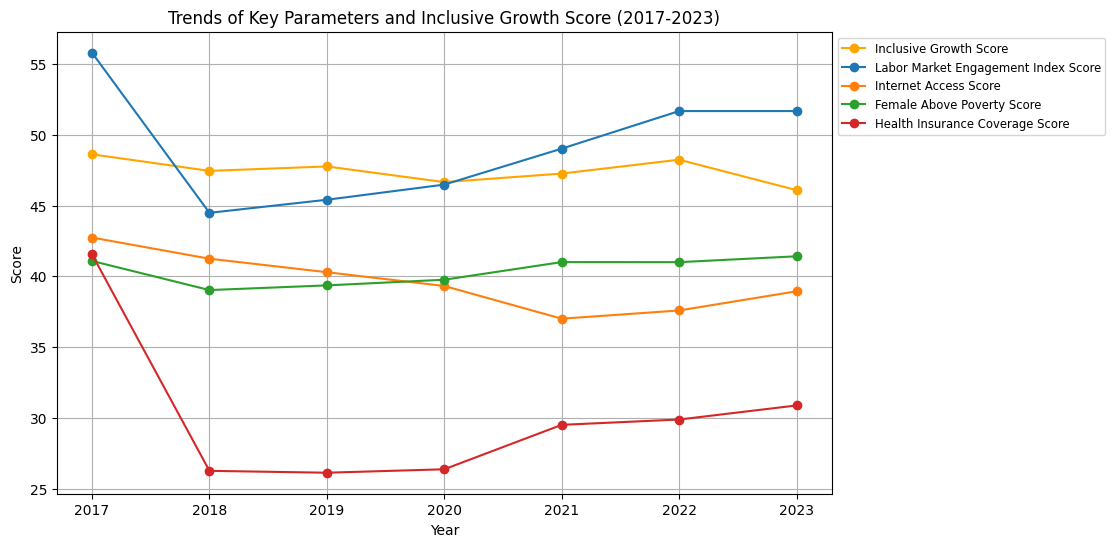

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a dictionary to store data for each year
yearly_data = {
    'Year': [2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Inclusive Growth Score': [],
    'Labor Market Engagement Index Score': [],
    'Internet Access Score': [],
    'Female Above Poverty Score': [],
    'Health Insurance Coverage Score': []  # Adding Health Insurance Coverage Score
}

# Assuming you have cleaned and averaged the datasets for each year (2017 to 2023),
# extract the values for these five parameters and store them in the dictionary.

# For 2017
yearly_data['Inclusive Growth Score'].append(miami17_data['Inclusive Growth Score'].mean())
yearly_data['Labor Market Engagement Index Score'].append(miami17_data['Labor Market Engagement Index Score'].mean())
yearly_data['Internet Access Score'].append(miami17_data['Internet Access Score'].mean())
yearly_data['Female Above Poverty Score'].append(miami17_data['Female Above Poverty Score'].mean())
yearly_data['Health Insurance Coverage Score'].append(miami17_data['Health Insurance Coverage Score'].mean())  # New entry

# Repeat for other years
yearly_data['Inclusive Growth Score'].append(miami18_data['Inclusive Growth Score'].mean())
yearly_data['Labor Market Engagement Index Score'].append(miami18_data['Labor Market Engagement Index Score'].mean())
yearly_data['Internet Access Score'].append(miami18_data['Internet Access Score'].mean())
yearly_data['Female Above Poverty Score'].append(miami18_data['Female Above Poverty Score'].mean())
yearly_data['Health Insurance Coverage Score'].append(miami18_data['Health Insurance Coverage Score'].mean())  # New entry

yearly_data['Inclusive Growth Score'].append(miami19_data['Inclusive Growth Score'].mean())
yearly_data['Labor Market Engagement Index Score'].append(miami19_data['Labor Market Engagement Index Score'].mean())
yearly_data['Internet Access Score'].append(miami19_data['Internet Access Score'].mean())
yearly_data['Female Above Poverty Score'].append(miami19_data['Female Above Poverty Score'].mean())
yearly_data['Health Insurance Coverage Score'].append(miami19_data['Health Insurance Coverage Score'].mean())  # New entry

yearly_data['Inclusive Growth Score'].append(miami20_data['Inclusive Growth Score'].mean())
yearly_data['Labor Market Engagement Index Score'].append(miami20_data['Labor Market Engagement Index Score'].mean())
yearly_data['Internet Access Score'].append(miami20_data['Internet Access Score'].mean())
yearly_data['Female Above Poverty Score'].append(miami20_data['Female Above Poverty Score'].mean())
yearly_data['Health Insurance Coverage Score'].append(miami20_data['Health Insurance Coverage Score'].mean())  # New entry

yearly_data['Inclusive Growth Score'].append(miami21_data['Inclusive Growth Score'].mean())
yearly_data['Labor Market Engagement Index Score'].append(miami21_data['Labor Market Engagement Index Score'].mean())
yearly_data['Internet Access Score'].append(miami21_data['Internet Access Score'].mean())
yearly_data['Female Above Poverty Score'].append(miami21_data['Female Above Poverty Score'].mean())
yearly_data['Health Insurance Coverage Score'].append(miami21_data['Health Insurance Coverage Score'].mean())  # New entry

yearly_data['Inclusive Growth Score'].append(miami22_data['Inclusive Growth Score'].mean())
yearly_data['Labor Market Engagement Index Score'].append(miami22_data['Labor Market Engagement Index Score'].mean())
yearly_data['Internet Access Score'].append(miami22_data['Internet Access Score'].mean())
yearly_data['Female Above Poverty Score'].append(miami22_data['Female Above Poverty Score'].mean())
yearly_data['Health Insurance Coverage Score'].append(miami22_data['Health Insurance Coverage Score'].mean())  # New entry

yearly_data['Inclusive Growth Score'].append(miami23_data['Inclusive Growth Score'].mean())
yearly_data['Labor Market Engagement Index Score'].append(miami23_data['Labor Market Engagement Index Score'].mean())
yearly_data['Internet Access Score'].append(miami23_data['Internet Access Score'].mean())
yearly_data['Female Above Poverty Score'].append(miami23_data['Female Above Poverty Score'].mean())
yearly_data['Health Insurance Coverage Score'].append(miami23_data['Health Insurance Coverage Score'].mean())  # New entry

# Convert the dictionary into a DataFrame
df_yearly_data = pd.DataFrame(yearly_data)

# Plot the trends for each of the five parameters over time
plt.figure(figsize=(10, 6))

# Inclusive Growth Score
plt.plot(df_yearly_data['Year'], df_yearly_data['Inclusive Growth Score'], label='Inclusive Growth Score', marker='o', color='orange')

# Labor Market Engagement Index Score
plt.plot(df_yearly_data['Year'], df_yearly_data['Labor Market Engagement Index Score'], label='Labor Market Engagement Index Score', marker='o')

# Internet Access Score
plt.plot(df_yearly_data['Year'], df_yearly_data['Internet Access Score'], label='Internet Access Score', marker='o')

# Female Above Poverty Score
plt.plot(df_yearly_data['Year'], df_yearly_data['Female Above Poverty Score'], label='Female Above Poverty Score', marker='o')

# Health Insurance Coverage Score
plt.plot(df_yearly_data['Year'], df_yearly_data['Health Insurance Coverage Score'], label='Health Insurance Coverage Score', marker='o')

# Customize the plot
plt.title('Trends of Key Parameters and Inclusive Growth Score (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.xticks(df_yearly_data['Year'])  # Show all years on the x-axis
plt.show()


In [ ]:
df_yearly_data

Year  Inclusive Growth Score  Labor Market Engagement Index Score  \
0  2017               48.629921                            55.811765   
1  2018               47.457677                            44.492141   
2  2019               47.771654                            45.416503   
3  2020               46.662402                            46.487230   
4  2021               47.268072                            49.030392   
5  2022               48.248509                            51.686888   
6  2023               46.097416                            51.686888   

   Internet Access Score  Female Above Poverty Score  \
0              42.744094                   41.090020   
1              41.249016                   39.031311   
2              40.294291                   39.362035   
3              39.319882                   39.762231   
4              37.008230                   41.009356   
5              37.588235                   41.005155   
6              38.943662                   41.418699   

   Health Insurance Coverage Score  
0                        41.555118  
1                        26.250984  
2                        26.117126  
3                        26.361220  
4                        29.502083  
5                        29.878914  
6                        30.872967

In [ ]:


# Create a dictionary to store data for each year for additional parameters
yearly_data_additional = {
    'Year': [2017, 2018, 2019, 2020, 2021, 2022, 2023],
    'Affordable Housing Score': [],
    'New Businesses Score': [],
    'Health Insurance Coverage Score': [],
    'Acres of Park Land Score': [],
    'Small Business Loans Score': [],
    'Gini Coefficient Score': [],
    'Spending per Capita Score': []
}

# Function to safely append mean values for a given column and year
def append_mean_value(df, column_name, year):
    if column_name in df.columns:
        yearly_data_additional[column_name].append(df[column_name].mean())
    else:
        yearly_data_additional[column_name].append(float('nan'))  # Append NaN if the column is missing

# For 2017
append_mean_value(miami17_data, 'Affordable Housing Score', 2017)
append_mean_value(miami17_data, 'New Businesses Score', 2017)
append_mean_value(miami17_data, 'Health Insurance Coverage Score', 2017)
append_mean_value(miami17_data, 'Acres of Park Land Score', 2017)
append_mean_value(miami17_data, 'Small Business Loans Score', 2017)
append_mean_value(miami17_data, 'Gini Coefficient Score', 2017)
append_mean_value(miami17_data, 'Spending per Capita Score', 2017)

# Repeat for the other years

append_mean_value(miami18_data, 'Affordable Housing Score', 2018)
append_mean_value(miami18_data, 'New Businesses Score', 2018)
append_mean_value(miami18_data, 'Health Insurance Coverage Score', 2018)
append_mean_value(miami18_data, 'Acres of Park Land Score', 2018)
append_mean_value(miami18_data, 'Small Business Loans Score', 2018)
append_mean_value(miami18_data, 'Gini Coefficient Score', 2018)
append_mean_value(miami18_data, 'Spending per Capita Score', 2018)

# Continue for 2019, 2020, 2021, 2022, 2023
# Ensure that you call the `append_mean_value` function for each year and parameter.

# Convert the dictionary into a DataFrame
df_yearly_data_additional = pd.DataFrame(yearly_data_additional)

# Plot the trends for each additional parameter over time
plt.figure(figsize=(12, 8))

plt.plot(df_yearly_data_additional['Year'], df_yearly_data_additional['Affordable Housing Score'], label='Affordable Housing Score', marker='o')
plt.plot(df_yearly_data_additional['Year'], df_yearly_data_additional['New Businesses Score'], label='New Businesses Score', marker='o')
plt.plot(df_yearly_data_additional['Year'], df_yearly_data_additional['Health Insurance Coverage Score'], label='Health Insurance Coverage Score', marker='o')
plt.plot(df_yearly_data_additional['Year'], df_yearly_data_additional['Acres of Park Land Score'], label='Acres of Park Land Score', marker='o')
plt.plot(df_yearly_data_additional['Year'], df_yearly_data_additional['Small Business Loans Score'], label='Small Business Loans Score', marker='o')
plt.plot(df_yearly_data_additional['Year'], df_yearly_data_additional['Gini Coefficient Score'], label='Gini Coefficient Score', marker='o')
plt.plot(df_yearly_data_additional['Year'], df_yearly_data_additional['Spending per Capita Score'], label='Spending per Capita Score', marker='o')

# Customize the plot
plt.title('Trends of Additional Parameters (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Score')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(df_yearly_data_additional['Year'])
plt.show()


ValueError: All arrays must be of the same length

In [ ]:


data_path = '/content/drive/MyDrive/MasterCard Data Challenge/Data Sets/CSV_Versions/USA_IGSCORE.csv'
data = pd.read_csv(data_path, header =1)
print (data.columns)

columns_to_drop = ['Census Tract FIPS code', 'State', 'Growth', 'Inclusion', 'N/A']
OVR_data = data.drop(columns=columns_to_drop)
OVR_data = OVR_data.drop(0).reset_index(drop=True)
OVR_data

Index(['N/A', 'Is an Opportunity Zone', 'Census Tract FIPS code', 'County',
       'State', 'Year', 'Inclusive Growth Score', 'Growth', 'Inclusion'],
      dtype='object')


Is an Opportunity Zone             County    Year  \
0                        Yes        Leon County  2017.0   
1                        Yes        Leon County  2018.0   
2                        Yes        Leon County  2019.0   
3                        Yes        Leon County  2020.0   
4                        Yes        Leon County  2021.0   
...                      ...                ...     ...   
29388                    Yes  Palm Beach County  2019.0   
29389                    Yes  Palm Beach County  2020.0   
29390                    Yes  Palm Beach County  2021.0   
29391                    Yes  Palm Beach County  2022.0   
29392                    Yes  Palm Beach County  2023.0   

       Inclusive Growth Score  
0                        21.0  
1                        24.0  
2                        26.0  
3                        20.0  
4                        27.0  
...                       ...  
29388                    46.0  
29389                    40.0  
29390                    46.0  
29391                    43.0  
29392                    40.0  

[29393 rows x 4 columns]

In [ ]:
# datasets for each year
yearly_data = {
    '2017': miami17_data,
    '2018': miami18_data,
    '2019': miami19_data,
    '2020': miami20_data,
    '2021': miami21_data,
    '2022': miami22_data,
    '2023': miami23_data
}

# Initialize an empty dictionary to store the filtered lower scores for each year
low_scores_by_year = {}

# Define the threshold for lower scores
low_score_min = 23
low_score_max = 45

# Loop through each dataset for each year
for year, data in yearly_data.items():
    # Step 1: Sort the data based on 'Inclusive Growth Score' in ascending order
    sorted_data = data.sort_values(by='Inclusive Growth Score', ascending=True)

    # Step 2: Filter the data to get the lower scores between 23 and 45
    low_score_data = sorted_data[(sorted_data['Inclusive Growth Score'] >= low_score_min) & (sorted_data['Inclusive Growth Score'] <= low_score_max)]

    # Step 3: Store the filtered lower scores in the dictionary
    low_scores_by_year[year] = low_score_data

    # Print or verify the filtered data for each year
    print(f"Low scores for {year}:")
    print(low_scores_by_year[year].head())




Low scores for 2017:
     N/A_x  Is an Opportunity Zone_x  Census Tract FIPS code  \
108  302.0                         1            1.208600e+10   
321  378.0                         0            1.208601e+10   
122  315.0                         1            1.208600e+10   
514  130.0                         0            1.208698e+10   
87    11.0                         0            1.208600e+10   

     Inclusive Growth Score_x  Growth_x  Inclusion_x  Place_x  Place Growth_x  \
108                      26.0      32.0         21.0     38.0            39.0   
321                      24.0      29.0         20.0     22.0            33.0   
122                      24.0      29.0         20.0     24.0            28.0   
514                      28.0      23.0         32.0     55.0            67.0   
87                       30.0      39.0         20.0     18.0            21.0   

     Place Inclusion_x  Net Occupancy Score_x  ...  \
108               37.0                   70.0  ...   

In [ ]:
# Initialize an empty list to store the data for each year
combined_data = []

# Loop through the low_scores_by_year dictionary and add a 'Year' column
for year, data in low_scores_by_year.items():
    # Step 1: Add the 'Year' column
    data['Year'] = year

    # Step 2: Append the data to the list
    combined_data.append(data)

# Step 3: Concatenate all the dataframes together
combined_df = pd.concat(combined_data, ignore_index=True)

# Drop columns that contain certain keywords
combined_df = combined_df.filter(regex='^(?!Spend Growth Base|Spend Growth Tract|County|State)').copy()

# Step 5: Group by 'Year' and calculate the average of 'Inclusive Growth Score'
average_low_inclusive_score = combined_df.groupby('Year')['Inclusive Growth Score'].mean().reset_index()

# Step 6: Print the result
print(average_low_inclusive_score)

# Optional: Save the result to a CSV file if needed
average_low_inclusive_score.to_csv('/content/drive/MyDrive/MasterCard Data Challenge/Data Sets/CSV_Versions/average_inclusive_growth_by_year.csv', index=False)
average_low_inclusive_score

<ipython-input-28-d19dccb09ea6>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = year


   Year  Inclusive Growth Score
0  2017               38.796954
1  2018               39.131696
2  2019               39.857477
3  2020               39.486957
4  2021               39.913146
5  2022               40.204023
6  2023               39.134615


Year  Inclusive Growth Score
0  2017               38.796954
1  2018               39.131696
2  2019               39.857477
3  2020               39.486957
4  2021               39.913146
5  2022               40.204023
6  2023               39.134615

#Benchmarking

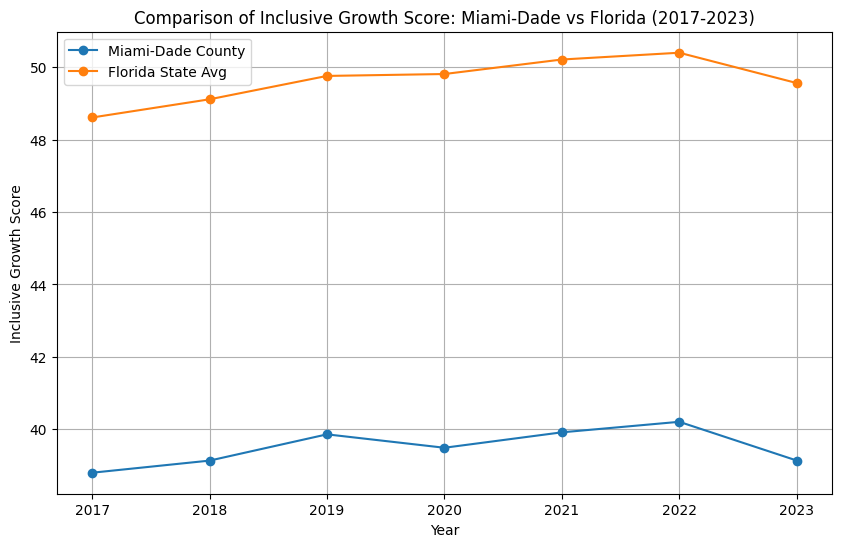

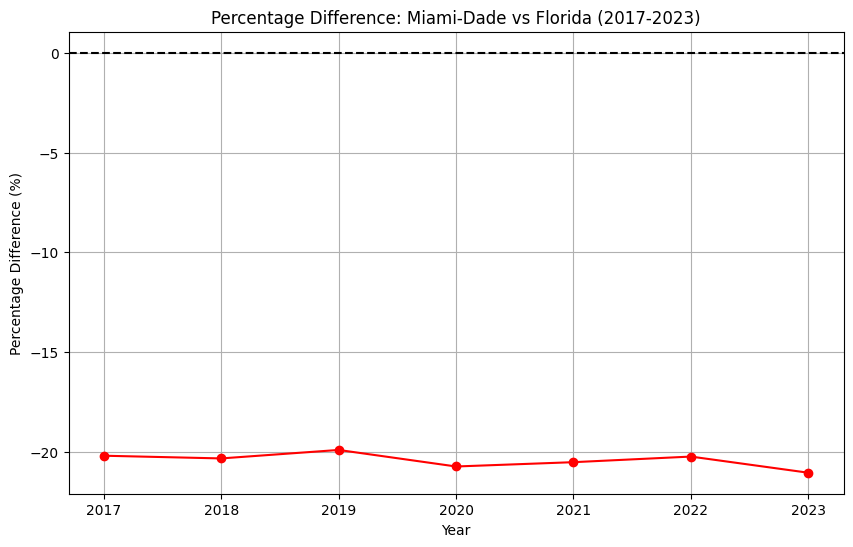

In [ ]:
# Extract Year and Inclusive Growth Score from OVR_data
florida_state_data = OVR_data[['Year', 'Inclusive Growth Score']].copy()

#florida_state_data

average_low_inclusive_score['Year'] = average_low_inclusive_score['Year'].astype(int)
florida_state_data['Year'] = florida_state_data['Year'].astype(int)

# Merge the Miami-Dade data with the overall Florida state data
benchmark_data = pd.merge(average_low_inclusive_score, florida_state_data, on='Year', suffixes=('_MiamiDade', '_Florida'))
#benchmark_data

# Group by 'Year' and calculate the average Inclusive Growth Score for each year
benchmark_data_grouped = benchmark_data.groupby('Year').mean().reset_index()

# Calculate the percentage difference after grouping
benchmark_data_grouped['Percentage Difference'] = (
    (benchmark_data_grouped['Inclusive Growth Score_MiamiDade'] - benchmark_data_grouped['Inclusive Growth Score_Florida'])
    / benchmark_data_grouped['Inclusive Growth Score_Florida']
) * 100

#Plot both Miami-Dade and Florida state averages after grouping
plt.figure(figsize=(10, 6))

# Plot Miami-Dade County's Inclusive Growth Score
plt.plot(benchmark_data_grouped['Year'], benchmark_data_grouped['Inclusive Growth Score_MiamiDade'], label='Miami-Dade County', marker='o')

# Plot Florida State's Inclusive Growth Score
plt.plot(benchmark_data_grouped['Year'], benchmark_data_grouped['Inclusive Growth Score_Florida'], label='Florida State Avg', marker='o')

#Plot
plt.title('Comparison of Inclusive Growth Score: Miami-Dade vs Florida (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Inclusive Growth Score')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(benchmark_data_grouped['Year'])

# Show the plot
plt.show()

#  Plot the percentage difference
plt.figure(figsize=(10, 6))
plt.plot(benchmark_data_grouped['Year'], benchmark_data_grouped['Percentage Difference'], label='Percentage Difference', color='red', marker='o')

# Plot
plt.title('Percentage Difference: Miami-Dade vs Florida (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Percentage Difference (%)')
plt.axhline(0, color='black', linestyle='--')  # Add a horizontal line at 0% difference
plt.grid(True)
plt.xticks(benchmark_data_grouped['Year'])

# Show the plot
plt.show()


# Preparing Dataset for training

In [ ]:
# Add 'Year' column to each dataset
datasets = [miami17_data, miami18_data, miami19_data, miami20_data, miami21_data, miami22_data, miami23_data]
for year, df in zip(range(2017, 2024), datasets):
    df['Year'] = year

# Combine all datasets into one DataFrame
df_all_years = pd.concat(datasets, axis=0)
df_all_years.reset_index(drop=True, inplace=True)

# Display shape and check for missing values
print(f"Combined Dataset Shape: {df_all_years.shape}")
print(df_all_years.isnull().sum())
#df_all_years.to_csv('sample2.csv', index=False)

Combined Dataset Shape: (3626, 200)
N/A_x                                  3108
Is an Opportunity Zone_x               3108
Census Tract FIPS code                    0
Inclusive Growth Score_x               3108
Growth_x                               3108
                                       ... 
Early Education Enrollment Tract, %       0
Health Insurance Coverage Score           0
Health Insurance Coverage Base, %         0
Health Insurance Coverage Tract, %        0
Year                                      0
Length: 200, dtype: int64


# Ridge Regression Model

Variance Inflation Factor (VIF):
                                  Feature        VIF
0                     Net Occupancy Score   7.914914
1     Residential Real Estate Value Score   9.235150
2                Acres of Park Land Score   3.750931
3                Affordable Housing Score   2.162662
4                   Internet Access Score   6.679111
5               Travel Time to Work Score   3.239680
6                    New Businesses Score   9.405481
7                      Spend Growth Score  10.267925
8              Small Business Loans Score  13.248275
9   Minority/Women Owned Businesses Score   3.471038
10    Labor Market Engagement Index Score  11.766408
11             Commercial Diversity Score   9.937848
12                  Personal Income Score   8.159512
13              Spending per Capita Score   7.706126
14             Female Above Poverty Score   9.404469
15                 Gini Coefficient Score   3.720966
16       Early Education Enrollment Score   5.816533
17        Hea

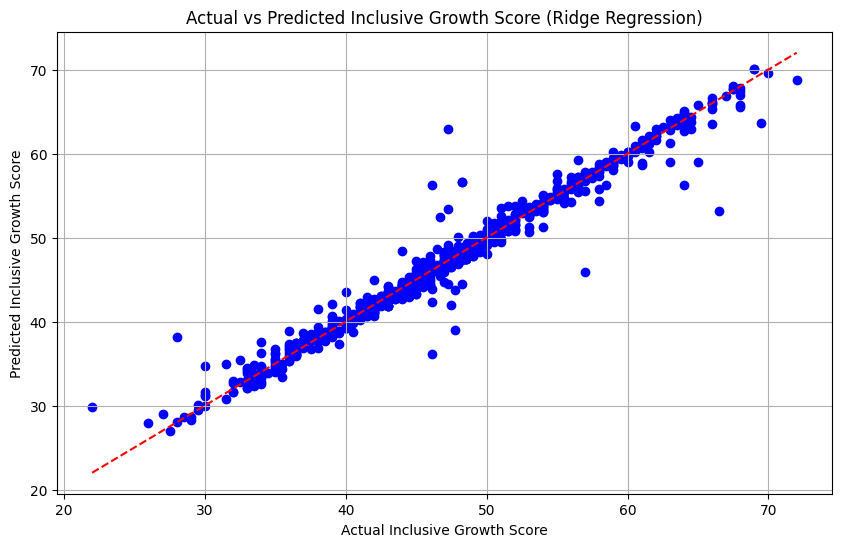

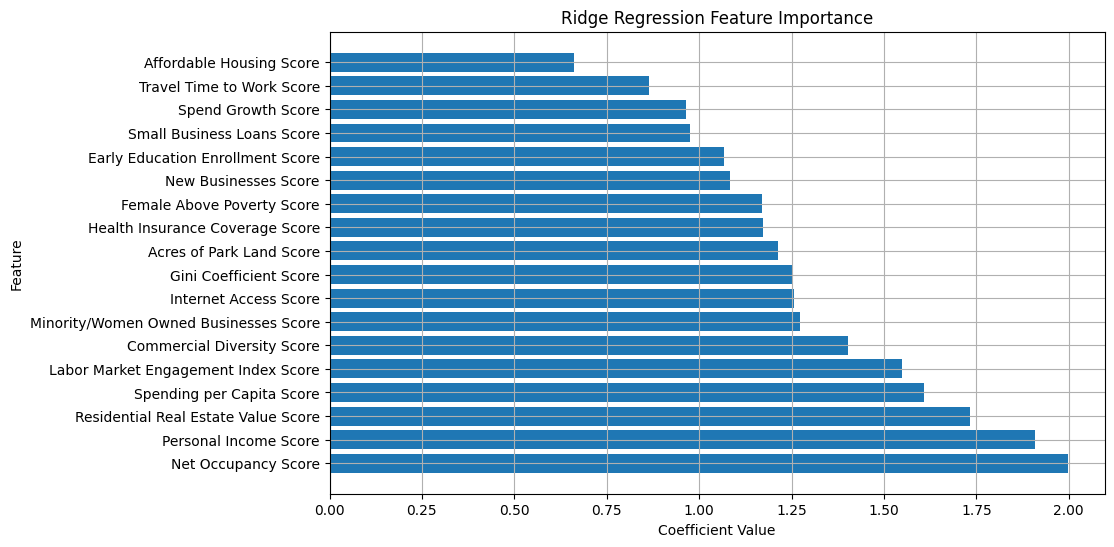

Ridge Regression Feature Importance:
                                  Feature  Importance
0                     Net Occupancy Score    1.996891
12                  Personal Income Score    1.908506
1     Residential Real Estate Value Score    1.732962
13              Spending per Capita Score    1.607235
10    Labor Market Engagement Index Score    1.548016
11             Commercial Diversity Score    1.401545
9   Minority/Women Owned Businesses Score    1.273310
4                   Internet Access Score    1.257138
15                 Gini Coefficient Score    1.252691
2                Acres of Park Land Score    1.214562
17        Health Insurance Coverage Score    1.172853
14             Female Above Poverty Score    1.169900
6                    New Businesses Score    1.082711
16       Early Education Enrollment Score    1.068014
8              Small Business Loans Score    0.975580
7                      Spend Growth Score    0.965232
5               Travel Time to Work Score    

In [ ]:
data = df_all_years.copy()

# Define the selected features and target variable
selected_features = [
    'Net Occupancy Score', 'Residential Real Estate Value Score',
    'Acres of Park Land Score', 'Affordable Housing Score',
    'Internet Access Score', 'Travel Time to Work Score',
    'New Businesses Score', 'Spend Growth Score',
    'Small Business Loans Score', 'Minority/Women Owned Businesses Score',
    'Labor Market Engagement Index Score', 'Commercial Diversity Score',
    'Personal Income Score', 'Spending per Capita Score',
    'Female Above Poverty Score', 'Gini Coefficient Score',
    'Early Education Enrollment Score', 'Health Insurance Coverage Score'
]
target = 'Inclusive Growth Score'

# Drop rows where the target is NaN
data = data.dropna(subset=[target])

# Select the features and target
X = data[selected_features]
y = data[target]

# Handle missing values in the selected features using median imputation
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Check for multicollinearity using Variance Inflation Factor (VIF)
vif_data = pd.DataFrame()
vif_data['Feature'] = selected_features
vif_data['VIF'] = [variance_inflation_factor(X_imputed, i) for i in range(X_imputed.shape[1])]
print("Variance Inflation Factor (VIF):")
print(vif_data)

# Step 7: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 8: Train a Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Step 9: Evaluate the model using cross-validation
ridge_cv_scores = cross_val_score(ridge_model, X_scaled, y, cv=5, scoring='r2')
print("Ridge Regression Cross-validated R² scores:", ridge_cv_scores)
print("Ridge Regression Mean R² score:", ridge_cv_scores.mean())

# Step 10: Make predictions on the test set
ridge_predictions = ridge_model.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
ridge_r2 = r2_score(y_test, ridge_predictions)
print(f'Ridge RMSE: {ridge_rmse:.2f}, Ridge R²: {ridge_r2:.2f}')

# Step 11: Predict the Inclusive Growth Score for 2024 (future prediction)
# To make future predictions, you need new data for 2024 or use the average of current feature values for prediction

# For simplicity, let's use the average values of the 2023 data (or the last year available in your dataset)
average_2023_features = X_scaled[-1]  # Assuming the last row corresponds to 2023

# Make prediction for 2024
predicted_2024_growth_score = ridge_model.predict([average_2023_features])[0]
print(f'Predicted Inclusive Growth Score for 2024: {predicted_2024_growth_score:.2f}')

# Step 12: Plot the actual vs predicted values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Inclusive Growth Score')
plt.ylabel('Predicted Inclusive Growth Score')
plt.title('Actual vs Predicted Inclusive Growth Score (Ridge Regression)')
plt.grid(True)
plt.show()

# Step 13: Plot the feature importance (coefficients)
ridge_feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': ridge_model.coef_
})
ridge_feature_importance = ridge_feature_importance.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(ridge_feature_importance['Feature'], ridge_feature_importance['Importance'])
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Ridge Regression Feature Importance')
plt.grid(True)
plt.show()

# Print sorted feature importance
print("Ridge Regression Feature Importance:")
print(ridge_feature_importance)


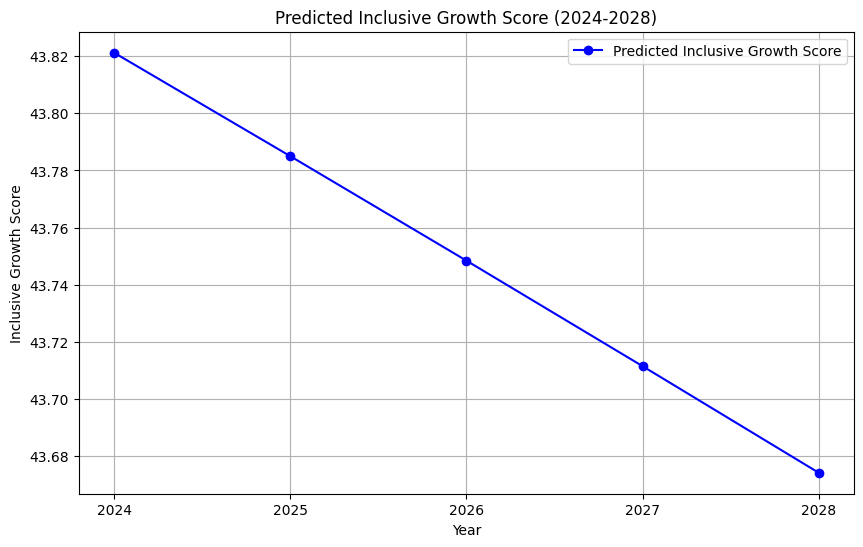

   Year  Predicted Inclusive Growth Score
0  2024                         43.821230
1  2025                         43.785009
2  2026                         43.748426
3  2027                         43.711477
4  2028                         43.674159


In [ ]:
# Create a DataFrame to store future year predictions
future_predictions = {'Year': [], 'Predicted Inclusive Growth Score': []}

# Assume the features stay the same for simplicity
# If we want, we can extrapolate features or use growth factors for the future (e.g., 1% increase per year)
average_2023_features = X_scaled[-1]  # Last year's scaled feature values (2023)

# Predict the next 5 years (2024 to 2028)
for future_year in range(2024, 2029):
    # Append the year
    future_predictions['Year'].append(future_year)

    # Predict the Inclusive Growth Score using the same features from 2023 for simplicity
    predicted_growth_score = ridge_model.predict([average_2023_features])[0]
    future_predictions['Predicted Inclusive Growth Score'].append(predicted_growth_score)

    # Optionally, modify features slightly for each year (e.g., adding a small increase to simulate growth)
    # Example: Simulate a 1% increase in all features for each year (adjust based on domain knowledge)
    # This is just a hypothetical scenario:
    average_2023_features = average_2023_features * 1.01  # Simulate 1% increase each year

# Convert the future predictions to a DataFrame
df_future_predictions = pd.DataFrame(future_predictions)

# Visualize the future predictions
plt.figure(figsize=(10, 6))
plt.plot(df_future_predictions['Year'], df_future_predictions['Predicted Inclusive Growth Score'], label='Predicted Inclusive Growth Score', marker='o', color='blue')

# Customize the plot
plt.title('Predicted Inclusive Growth Score (2024-2028)')
plt.xlabel('Year')
plt.ylabel('Inclusive Growth Score')
plt.grid(True)
plt.xticks(df_future_predictions['Year'])  # Show all years on the x-axis
plt.legend()
plt.show()

# Print the predictions for 2024 to 2028
print(df_future_predictions)

Interventions to predict improvement in the Future Inclusive Growth Scores

Predicted Inclusive Growth Score for 2025: 43.85
Predicted Inclusive Growth Score for 2026: 43.91
Predicted Inclusive Growth Score for 2027: 44.01
Predicted Inclusive Growth Score for 2028: 44.20
Predicted Inclusive Growth Score for 2029: 44.56


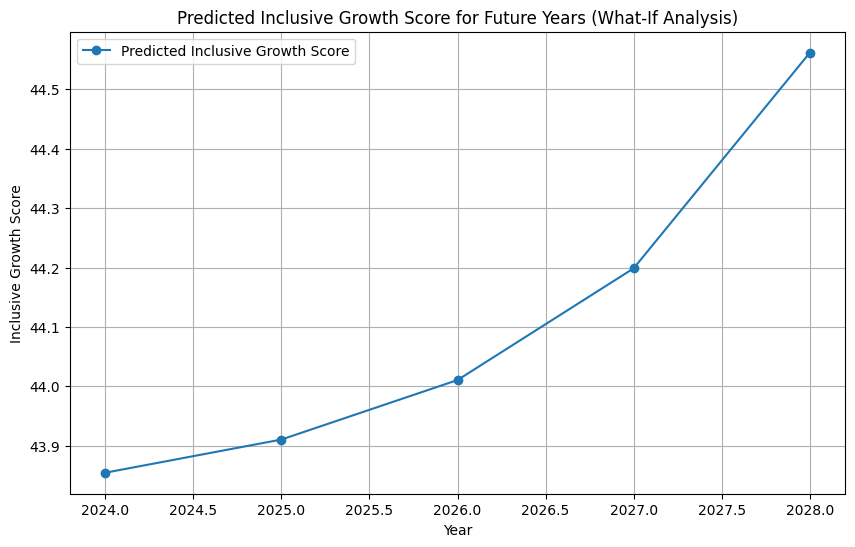

In [ ]:
# Increase values for key parameters in the simulation (e.g., +5%, +10%)
future_changes = {
    'Internet Access Score': 1.0,
    'Labor Market Engagement Index Score': 0.07,
    'Health Insurance Coverage Score': 0.05,
    'Female Above Poverty Score': 1.0
}

# Step 12: Function to simulate future values
def simulate_future_growth(current_features, change_percentages):
    future_features = current_features.copy()

    for feature, change in change_percentages.items():
        if feature in future_features:
            future_features[feature] = future_features[feature] * (1 + change)

    return future_features

# Step 13: Simulate changes over the next 5 years
years_to_predict = 5
predicted_scores = []

# Use 2023 as the baseline (last row of the dataset)
current_values = dict(zip(selected_features, X_scaled[-1]))

for year in range(1, years_to_predict + 1):
    future_values = simulate_future_growth(current_values, future_changes)
    predicted_score = ridge_model.predict([list(future_values.values())])[0]
    predicted_scores.append(predicted_score)

    # Update current values for next year prediction
    current_values = future_values.copy()

# Step 14: Print predicted scores for the next 5 years
for i, score in enumerate(predicted_scores, 1):
    print(f"Predicted Inclusive Growth Score for {2024 + i}: {score:.2f}")

# Step 15: Plot the predicted scores over the next 5 years
years = [2024 + i for i in range(years_to_predict)]
plt.figure(figsize=(10, 6))
plt.plot(years, predicted_scores, label='Predicted Inclusive Growth Score', marker='o')
plt.title('Predicted Inclusive Growth Score for Future Years (What-If Analysis)')
plt.xlabel('Year')
plt.ylabel('Inclusive Growth Score')
plt.grid(True)
plt.legend()
plt.show()

#References
Miami-Dade Website: https://www.miamidade.gov/global/economy/innovation-and-economic-development/economic-metrics.page.

IGS: https://inclusivegrowthscore.com/market/us/.

Quick Facts: https://www.census.gov/quickfacts/fact/table/miamidadecountyflorida/PST045223.

Miami Connected: https://www.miamifoundation.org/digitalequitygrant/.

Program Guidelines:  chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://miamifoundation.org/wp-content/uploads/2022/04/2022_DigitalEquityGrants_Guidelines_ENG_v3.2.pdf.

Census Data: https://data.census.gov/table/ACSST5Y2022.S2201





